# The following notebook generates numerical-data figures present in the paper:

In [157]:
from os.path import join

#scipy==1.3.1
import scipy

#statsmodels==0.11.1
import statsmodels
import statsmodels.stats.api as sms

#seaborn==0.11.1
import seaborn as sns

#unicodecsv==0.14.1
import csv

#numpy==1.18.1
import numpy as np

#pandas==1.0.1
import pandas as pd

#matplotlib==3.1.3
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams['figure.figsize'] = (32,26)
plt.rcParams['figure.dpi'] = 100

In [158]:
#Helper function definition

def triangle_heatmap(data, pvalues, txt, y_pos, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()
    
    cmaplist = [(220/255, 242/255, 162/255, 1.0), (228/255, 231/255, 231/255, 1.0)]
    outer_gray = (191/255, 195/255, 195/255, 1.0)
    outer_green = (174/255, 219/255, 59/255, 1.0)
    cm = matplotlib.colors.ListedColormap(cmaplist)
    norm = matplotlib.colors.BoundaryNorm([0, 0.05, 1], cm.N)
    
    cm.set_bad(color='white')
    matplotlib.pyplot.set_cmap(cm)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not np.isnan(data[i, j]):
                if txt == 0:
                    ax.text(j, i, str(round(data[i, j], 2)), ha="center", va="center", color="black", fontsize=50)
                    ax.text(j, i+0.2, 'p=' + str("%.2g" % pvalues[i, j]), ha="center", va="center", color="black", fontsize=25)
                    if pvalues[i, j] <= 0.05:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_green, fill=False, lw=15))
                    else:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_gray, fill=False, lw=15))
                else:
                    text = ax.text(j, i, str(txt[i, j]), ha="center", va="center", color="black", fontsize=100)
                    if pvalues[i, j] <= 0.05:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_green, fill=False, lw=15))
                    else:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_gray, fill=False, lw=15))
    im = ax.imshow(pvalues, cmap=cm, norm=norm, **kwargs)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor", fontsize=40)
    plt.setp(ax.get_yticklabels(), fontsize=40)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.grid(False)    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return ax, im
    

In [159]:
#Helper function definition

def triangle_heatmap_og(data, pvalues, txt, y_pos, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()
    
    cmaplist = [(220/255, 242/255, 162/255, 1.0), (228/255, 231/255, 231/255, 1.0)]
    outer_gray = (191/255, 195/255, 195/255, 1.0)
    outer_green = (174/255, 219/255, 59/255, 1.0)
    cm = matplotlib.colors.ListedColormap(cmaplist)
    norm = matplotlib.colors.BoundaryNorm([0, 0.05, 1], cm.N)
    
    cm.set_bad(color='white')
    matplotlib.pyplot.set_cmap(cm)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not np.isnan(data[i, j]):
                if txt == 0:
                    ax.text(j, i, str(round(data[i, j], 2)), ha="center", va="center", color="black", fontsize=60)
                    ax.text(j, i+0.2, 'p=' + str("%.2g" % pvalues[i, j]), ha="center", va="center", color="black", fontsize=40)
                    if pvalues[i, j] <= 0.05:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_green, fill=False, lw=33))
                    else:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_gray, fill=False, lw=33))
                else:
                    text = ax.text(j, i, str(txt[i, j]), ha="center", va="center", color="black", fontsize=100)
                    if pvalues[i, j] <= 0.05:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_green, fill=False, lw=33))
                    else:
                        ax.add_patch(Rectangle((j-0.45, i-0.45), 0.90, 0.90, edgecolor = outer_gray, fill=False, lw=33))
    im = ax.imshow(pvalues, cmap=cm, norm=norm, **kwargs)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor", fontsize=80)
    plt.setp(ax.get_yticklabels(), fontsize=80)

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.grid(False)    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return ax, im
    

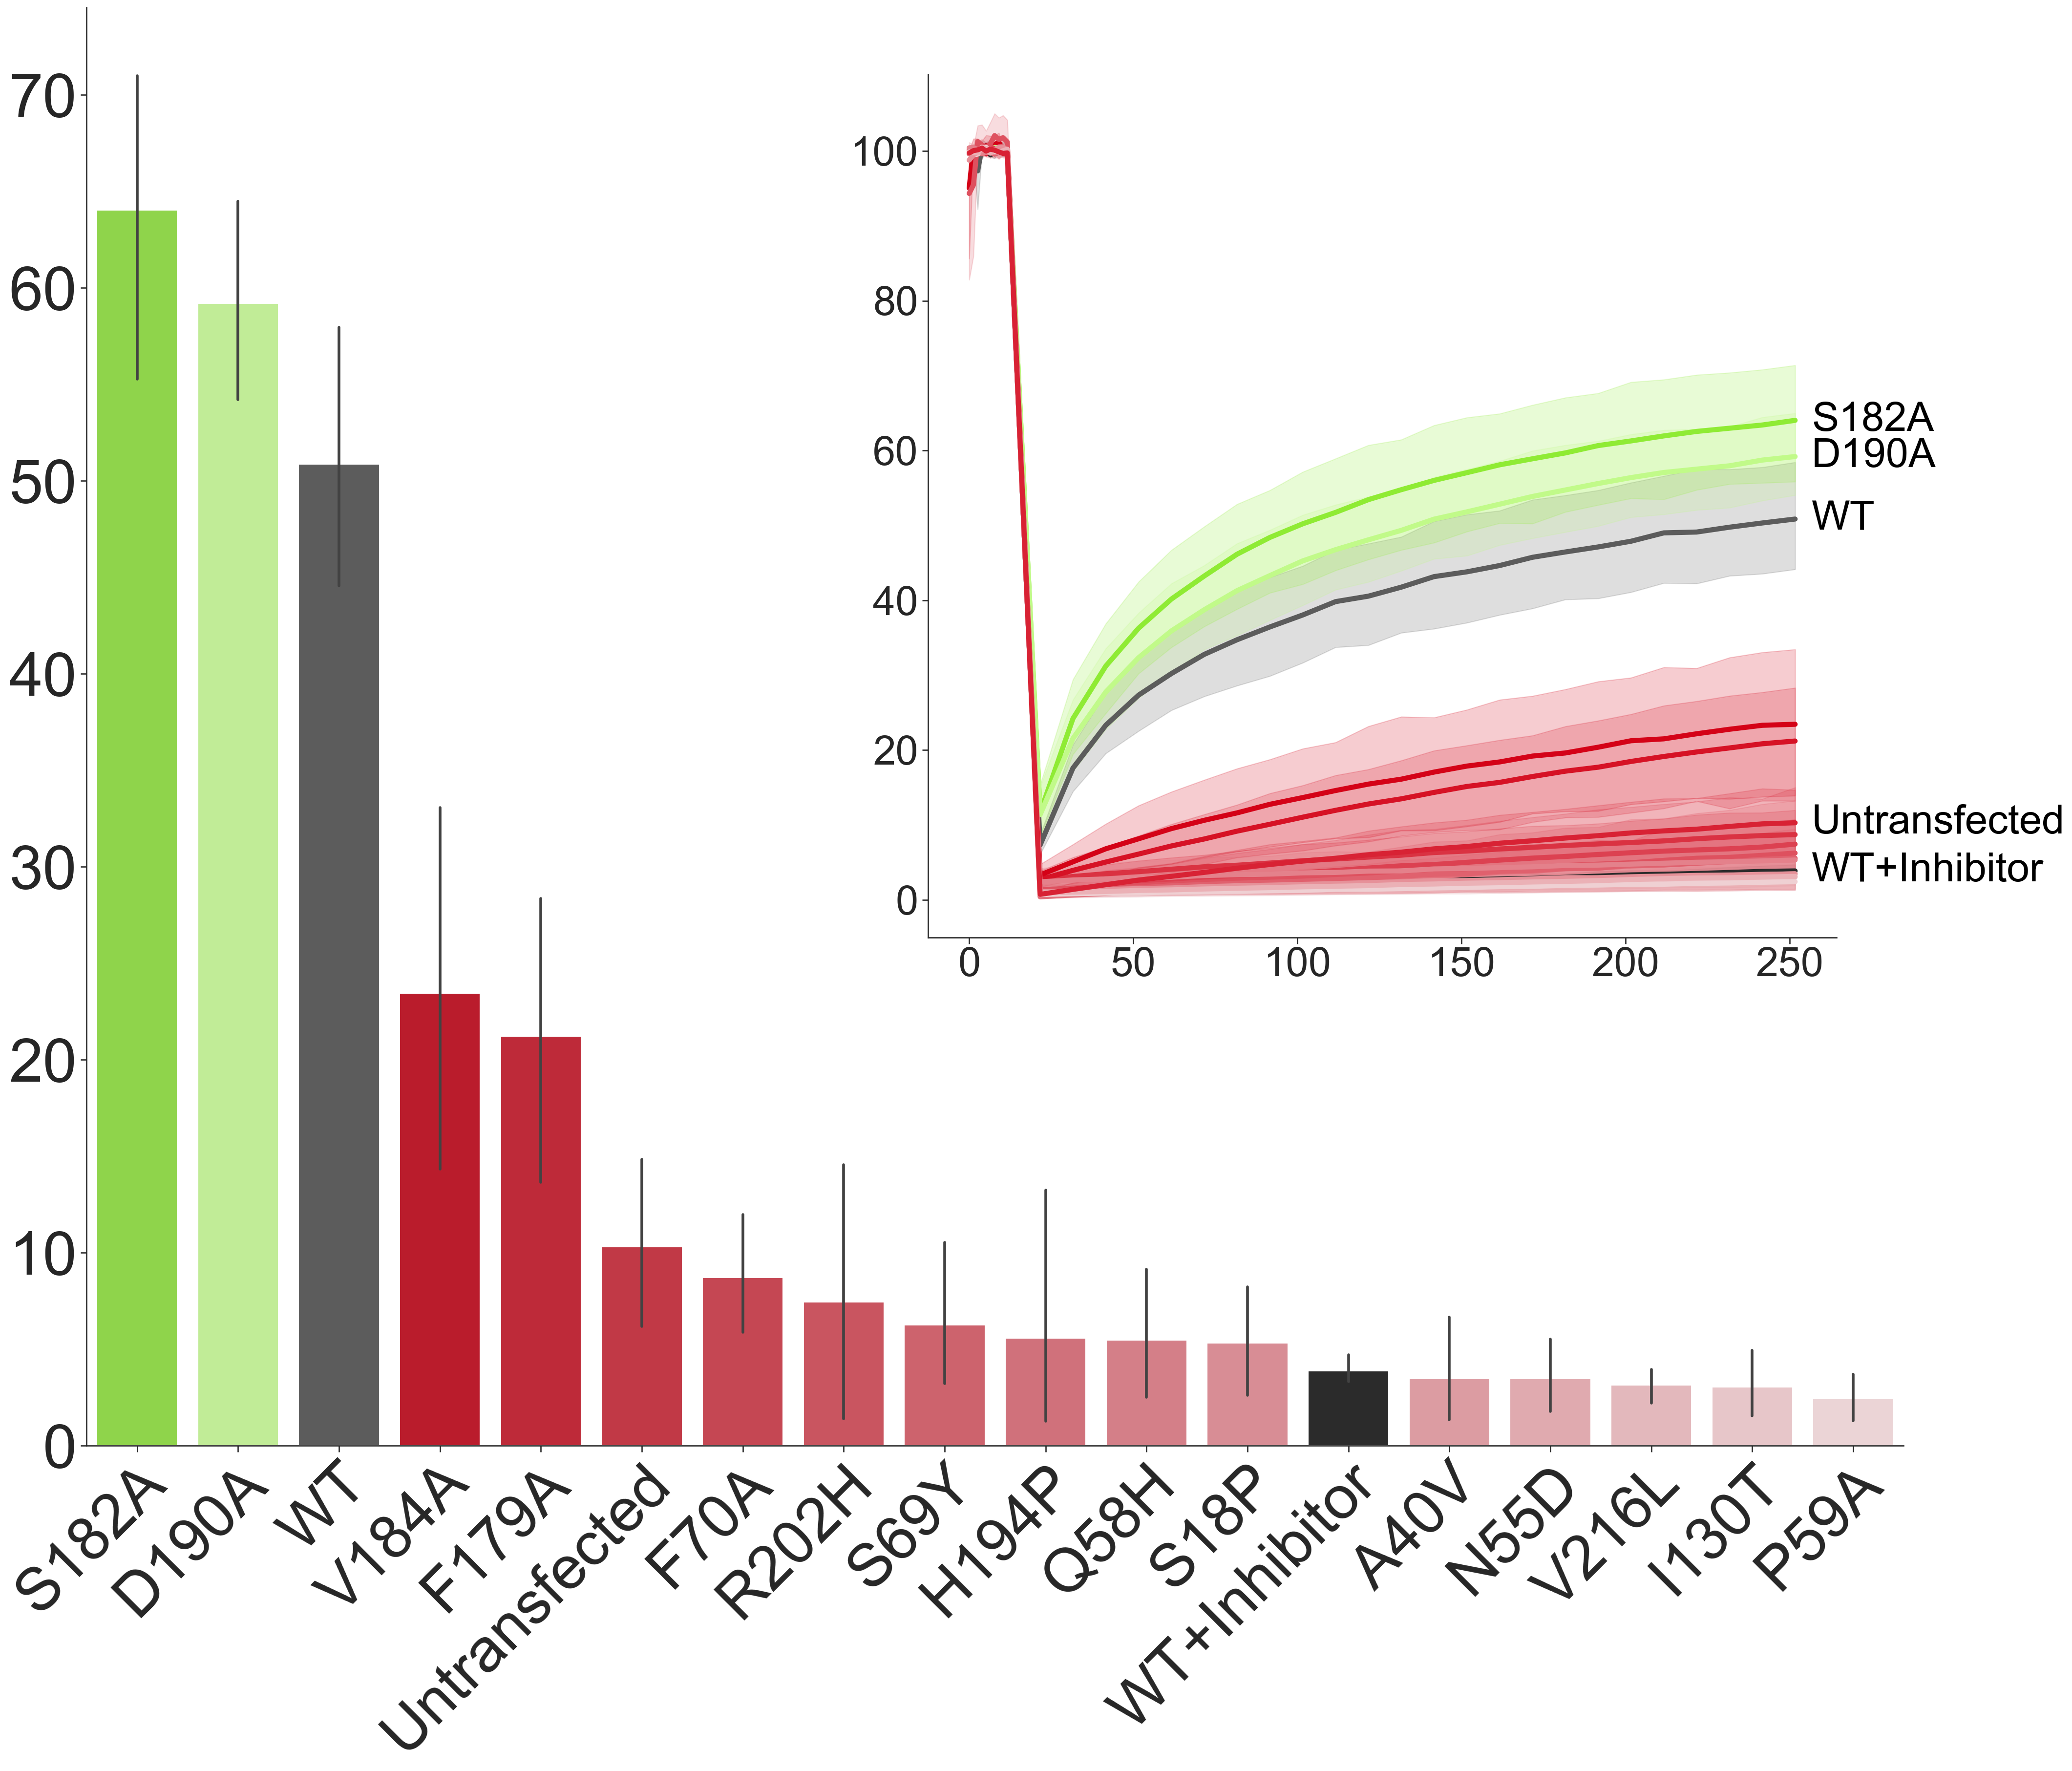

<Figure size 4800x3900 with 0 Axes>

In [185]:
#Gap-FRAP Figure generation
last_frame_before_bleach = 9
full_master = pd.read_csv(join('data', 'FRAP.csv'))

full_master = full_master[['frame', 'Percent Baseline', 'Unique ID', 'Biological Condition', 'timepoints']]
excluded_conditions = ['DKO6-UNTR', 'Cx43-ELs-Cx26', 'Cx43-ELs-Cx34.7', 'Cx36-WT', 'Cx35-WT', 'Cx36+EtBr', 'RFP+EtBr', 'Cx43-m4', 'Cx43-m28']
reduced_df = full_master.loc[~full_master['Biological Condition'].isin(excluded_conditions)].sort_values(by=['Biological Condition'])
reduced_df['Biological Condition'] = reduced_df['Biological Condition'].apply(lambda x : x.replace('Cx43-', ''))
mutant43_disambig = pd.read_csv('data/mutant43_disambig.csv')
mutant43_disambig = mutant43_disambig.rename(columns={"first_member": "Biological Condition"})
mutant43_disambig["Biological Condition"] = mutant43_disambig["Biological Condition"].apply(lambda x : x.replace('Cx43', ''))
reduced_df = pd.merge(reduced_df, mutant43_disambig, how="left", on="Biological Condition")
reduced_df['mutation'] = reduced_df['mutation'].where(~pd.isna(reduced_df['mutation']), other=reduced_df['Biological Condition'])
reduced_df['mutation'].unique()
reduced_df['mutation'] = reduced_df['mutation'].where(~pd.isna(reduced_df['mutation']), other=reduced_df['Biological Condition'])
reduced_df['mutation'].unique()
negative_colors = sns.light_palette('#d40217',reverse=True, n_colors=16)
color_assignment = {}
color_assignment['S182A'] = '#8feb34'
color_assignment['D190A'] = '#c1fa89'
color_assignment['WT'] = '#5c5c5c'
color_assignment['WT+Inhibitor'] = '#2b2b2b'
j = 0


cn = ['mutation', 'max recovery', 'frame', 'Percent Baseline', 'Unique ID', 'Biological Condition', 'timepoints']
m_frap = pd.DataFrame(columns = cn)
for uid in reduced_df['Unique ID'].unique():
    subframe = reduced_df.loc[reduced_df['Unique ID'] == uid]
    row = pd.DataFrame(columns = cn)
    row['mutation'] = [list(subframe['mutation'])[0]]
    row['max recovery'] = [list(subframe.loc[subframe['timepoints'] == subframe['timepoints'].max()]['Percent Baseline'])[0]]
    frames = [m_frap, row]
    m_frap = pd.concat(frames) 
    
m_frap['mean_recovery'] = [m_frap.loc[m_frap["mutation"] == i]["max recovery"].mean() for i in list(m_frap["mutation"])]
m_frap = m_frap.sort_values(by=['mean_recovery'], ascending=False) 
for i, item in enumerate(list(m_frap['mutation'])):
    if item not in color_assignment.keys():
        color_assignment[item] = negative_colors[j]
        j += 1
sns.set_style('ticks')    
ax = sns.barplot(x="mutation", y="max recovery", data=m_frap, palette=color_assignment)
sns.despine()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# ax.set_title("Max Recovery", fontsize=80)
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xlabel('Biological Conditions', fontsize=60)
# ax.set_ylabel('Percent', fontsize=60)
plt.setp(ax.get_xticklabels(), fontsize=60)
plt.setp(ax.get_yticklabels(), fontsize=60)

sns.set_style('ticks')  
axins = inset_axes(ax,  "50%", "60%" ,loc="upper right", borderpad=3)
g = sns.lineplot(data=reduced_df, x="timepoints", y="Percent Baseline", hue='mutation', palette=color_assignment, linewidth = 5, ax=axins)
g.legend_.remove()
sns.despine()
meandf = reduced_df[['mutation', 'Percent Baseline', 'timepoints']].groupby(['mutation', 'timepoints']).mean().reset_index()
meandf_lastframe = meandf.loc[(meandf['timepoints'] == max(list(meandf['timepoints'].unique())))]
individually_annotated = ['WT', 'D190A', 'S182A', 'Untransfected', 'WT+Inhibitor']

for index, row in meandf_lastframe.iterrows():
    if row['mutation'] in individually_annotated:
        axins.text(row['timepoints'] + 5, row['Percent Baseline'], row['mutation'], ha="left", va="center", color="black", fontsize=40)       
# axins.set_title("FRAP Percent Baseline Across Conditions", fontsize=52)
# axins.set_xlabel('Seconds', fontsize=36)
# axins.set_ylabel('Percent', fontsize=36)
axins.set_xlabel('')
axins.set_ylabel('')
plt.setp(axins.get_xticklabels(), fontsize=40)
plt.setp(axins.get_yticklabels(), fontsize=40)

plt.savefig(join('outputs', 'FRAP Percent Baseline Across Conditions inset.pdf'), format='pdf', bbox_inches='tight')
plt.show()
plt.cla()
plt.clf()

46 of known positives
36 of known positives that are just Cx43WT
33 of known negatives


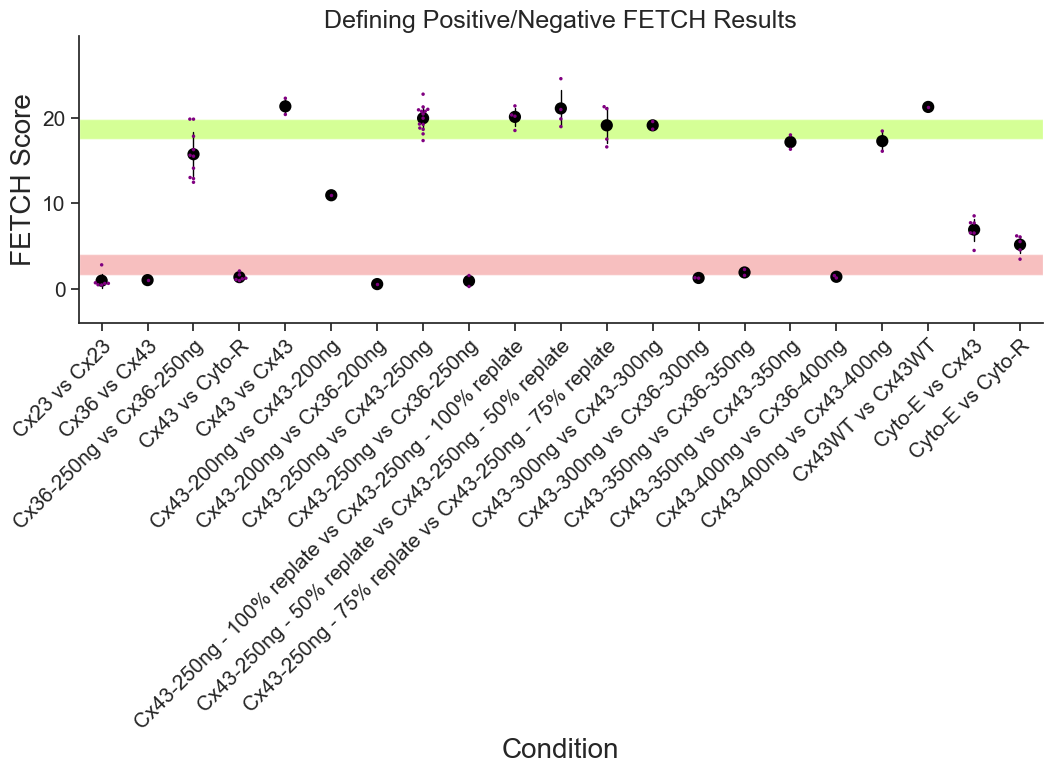

In [160]:
#Defining the distribution of known positive and known negative FETCH scores
score_df_39 = pd.read_csv(join('data/', 'score_df_39.csv'))
score_df_52 = pd.read_csv(join('data/', 'score_df_52.csv'))
score_df_53 = pd.read_csv(join('data/', 'score_df_53.csv'))
score_df_60 = pd.read_csv(join('data/', 'score_df_60.csv'))
score_df_61 = pd.read_csv(join('data/', 'score_df_61.csv'))
score_df_62 = pd.read_csv(join('data/', 'score_df_62.csv'))
score_df_66 = pd.read_csv(join('data/', 'score_df_66.csv'))


score_df_39_relevant = score_df_39.loc[score_df_39['first_member'] == 'Cx23']
score_df_60_relevant = score_df_60.loc[score_df_60['first_member'] == 'Cx23']
score_df_61_relevant = score_df_61.loc[score_df_61['first_member'] == 'Cx23']
score_df_62_relevant = score_df_62.loc[score_df_62['first_member'] == 'Cx23']
score_df_66_relevant = score_df_66.loc[(score_df_66['first_member'] == 'Cx23') | (score_df_66['FETCH_id'] == 'A12') | (score_df_66['FETCH_id'] == 'B12') | (score_df_66['FETCH_id'] == 'C09') | (score_df_66['FETCH_id'] == 'C12') | (((score_df_66['FETCH_id'].str.contains('G')) | (score_df_66['FETCH_id'].str.contains('H'))) & ~((score_df_66['first_member'] == 'Cx43') & (score_df_66['second_member'] == 'Cx43')))]

frames = [score_df_39_relevant, score_df_52, score_df_53, score_df_60_relevant, score_df_61_relevant, score_df_62_relevant, score_df_66_relevant]

#Merge all data together
all_together = pd.concat(frames)

#Exclude homotypic Cx36 and mutants (decided not to use as known positives or negatives)
# all_together = all_together.loc[~((all_together['first_member'].str.contains('Cx36') & all_together['second_member'].str.contains('Cx36')) | all_together['second_member'].str.contains('m'))]
all_together = all_together.loc[~all_together['second_member'].str.contains('m')]


all_together = all_together.sort_values(by=['first_member'], ascending = True)
all_together['compound_name'] = all_together['first_member'] + ' vs ' + all_together['second_member']

#Used less than 10 here because all negatives showed up below 10, so it was an easier gating mechanism than writing out each condition individually
neg_conditions = list(all_together[all_together['FETCH score'] < 10]['compound_name'])
neg_conditions = [x for x in neg_conditions]
all_positive = all_together[~all_together.compound_name.isin(neg_conditions)]['FETCH score']
all_positive_just43 = all_together[~all_together.compound_name.isin(neg_conditions) & ~(all_together['first_member'].str.contains('Cx36') & all_together['second_member'].str.contains('Cx36'))]['FETCH score']
all_negative = all_together[all_together.compound_name.isin(neg_conditions)]['FETCH score']
all_together['Is Positive'] = ['Known Negatives' if x in neg_conditions else 'Known Positives' for x in all_together['compound_name']]

#create 99% confidence interval for population mean weight; Make sure stats models is correct version as they changed alpha parameter recently
positive_conf = sms.DescrStatsW(all_positive).tconfint_mean(alpha=0.01)
negative_conf = sms.DescrStatsW(all_negative).tconfint_mean(alpha=0.01)
print(str(all_positive.shape[0]) + ' of known positives')
print(str(all_positive_just43.shape[0]) + ' of known positives that are just Cx43WT')
print(str(all_negative.shape[0]) + ' of known negatives')
colors = ["black" for i in range(all_together["compound_name"].unique().shape[0])]
sns.set_style('ticks')
sns.catplot(x="compound_name", y="FETCH score", palette=colors, kind="point", ci="sd", data=all_together, s=3, height=4, aspect=3)
ax = plt.gca()
for line in ax.lines:
    line.set_linewidth(1)
g = sns.swarmplot(x="compound_name", y="FETCH score", data=all_together, color="purple", s=2.5)
ax.set_xlabel('Condition', fontsize=20)
ax.set_ylabel('FETCH Score', fontsize=20)
ax.set_title("Defining Positive/Negative FETCH Results", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)
ax.set_ylim([-4,all_together['FETCH score'].max() + 5])
plt.margins(y=0)
plt.axhspan(negative_conf[0], negative_conf[1], facecolor='lightcoral', alpha=0.5, zorder=0)
plt.axhspan(positive_conf[0], positive_conf[1], facecolor='greenyellow', alpha=0.5, zorder=0)


plt.savefig(join("outputs", "Positive-Negative_fetch_definition.pdf"), format = 'pdf', bbox_inches='tight')
plt.show()
all_together.to_csv(join('outputs', 'Positive-Negative_fetch_definition.csv'))


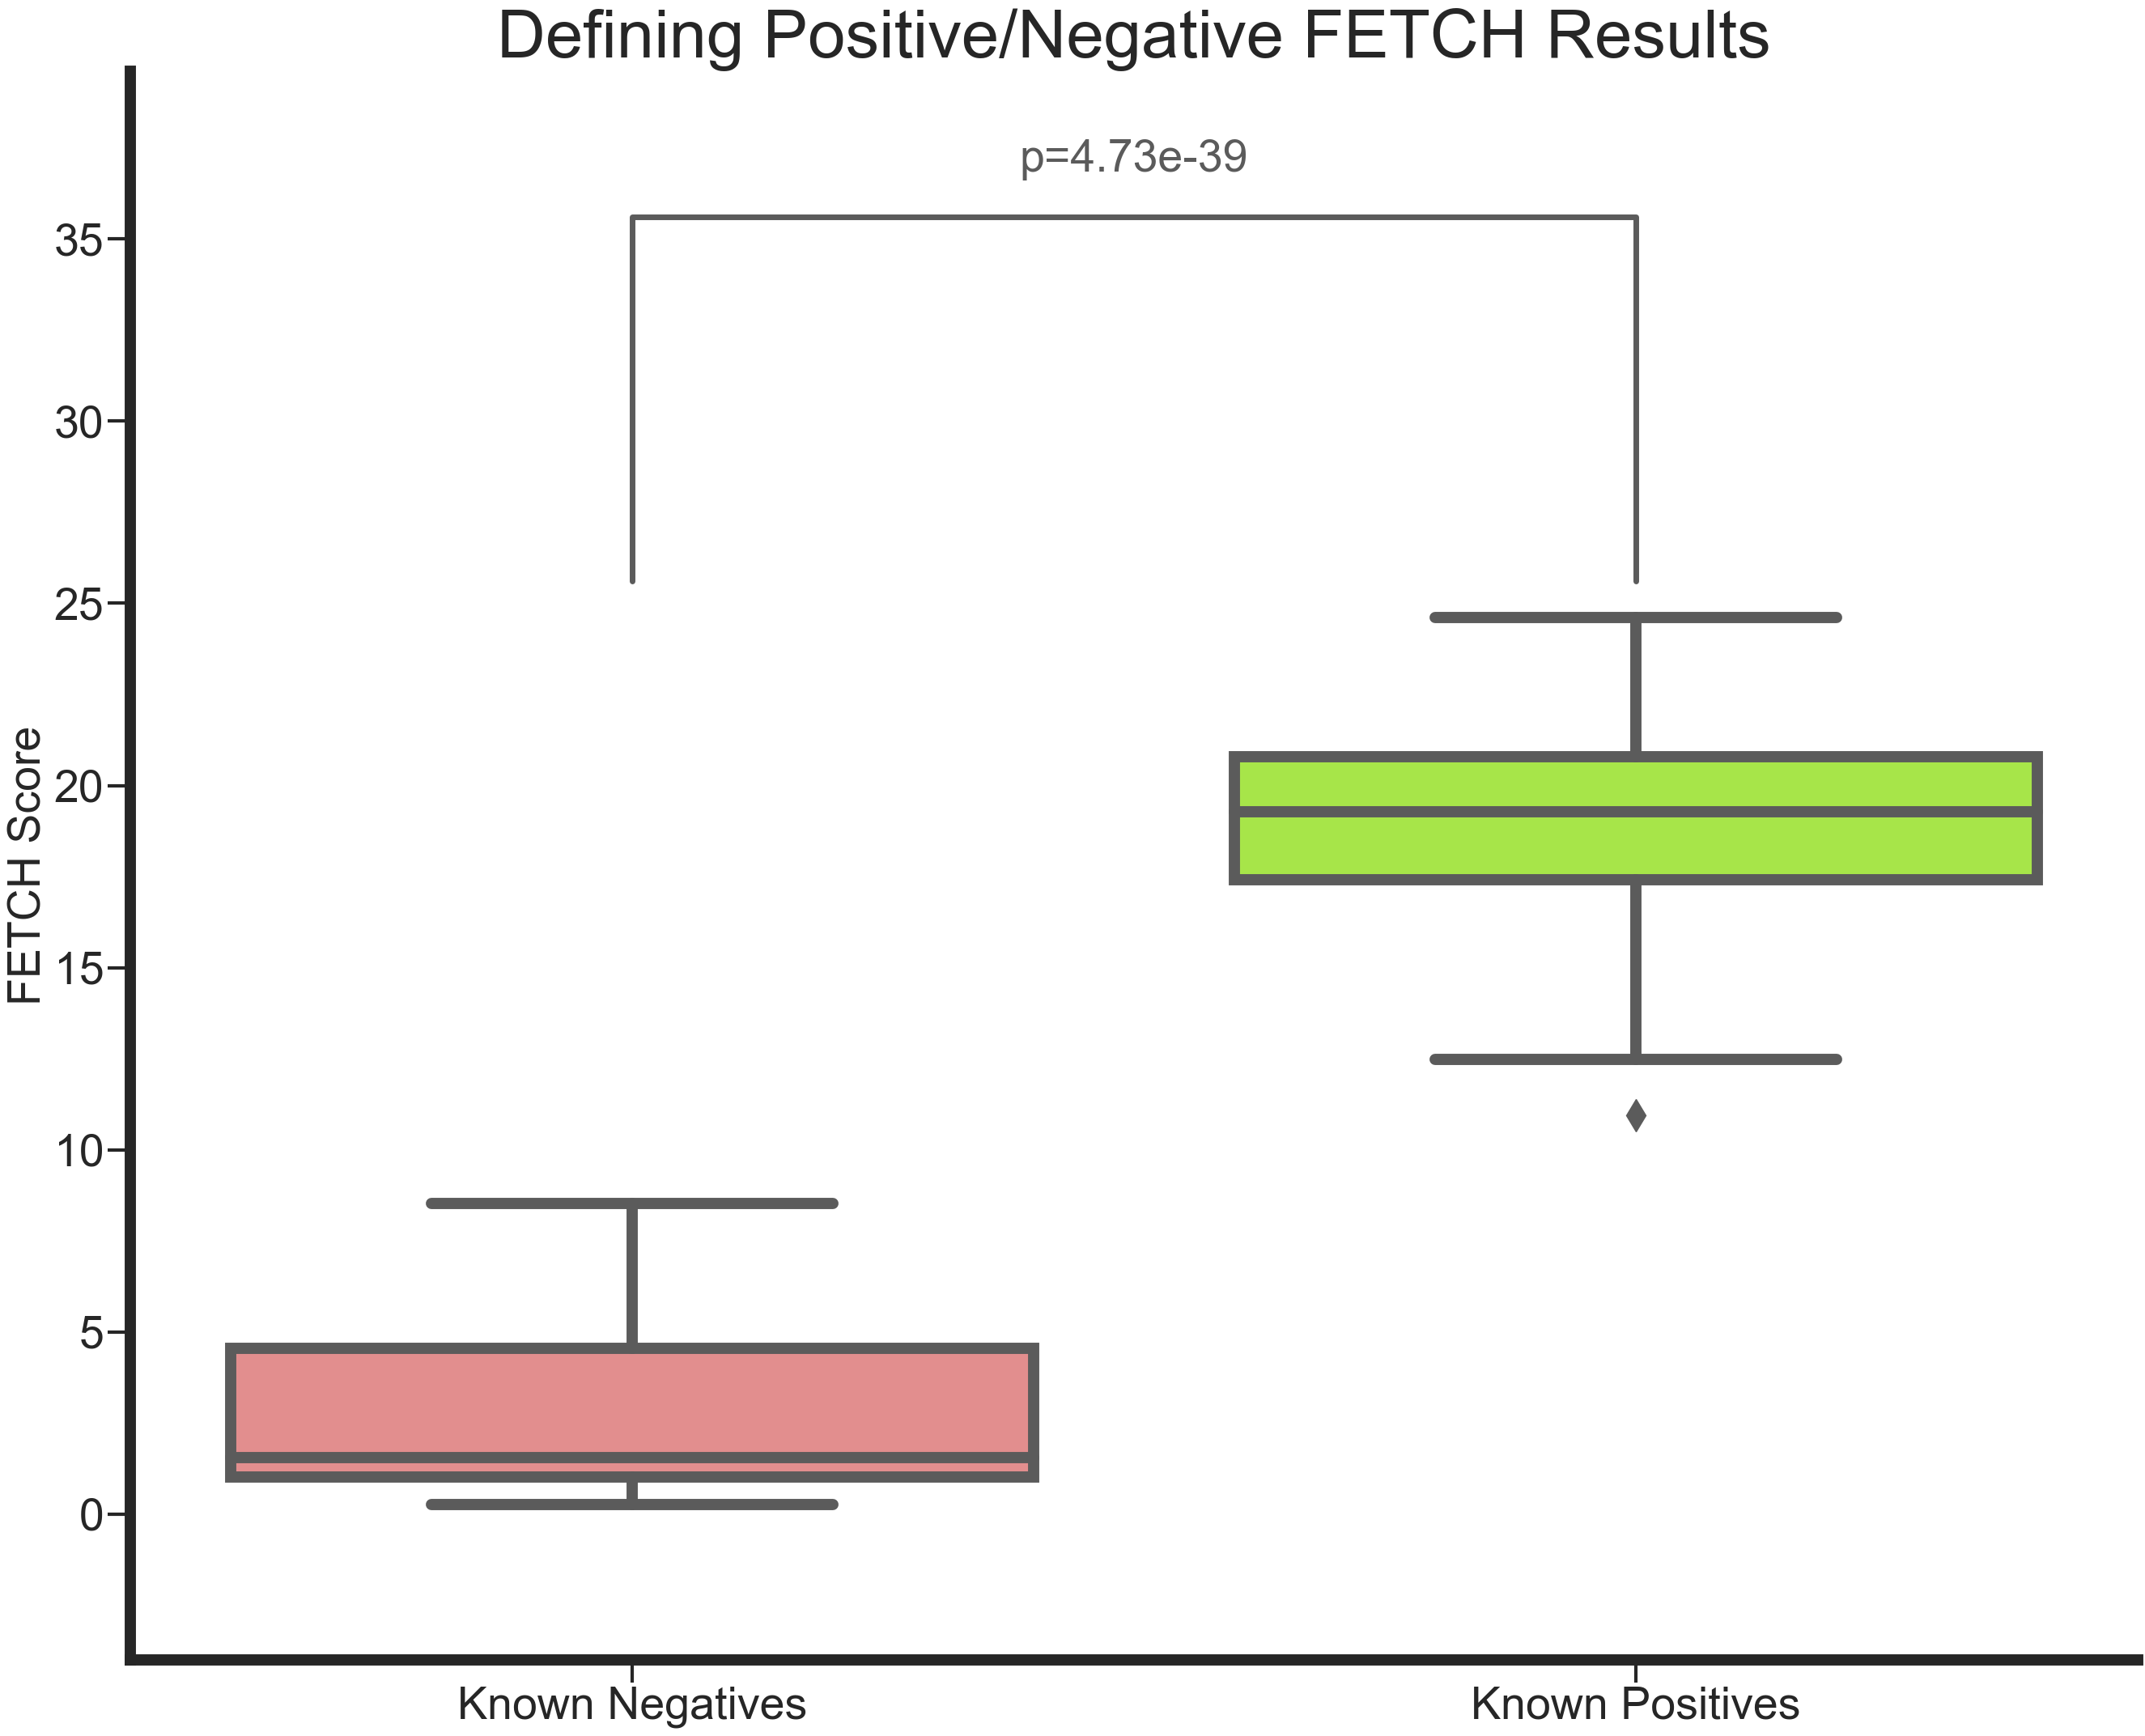

In [161]:
#A figure summarizing the definition of known positive and known negative FETCH score distributions
t, p = scipy.stats.ttest_ind(all_positive, all_negative)
colors = {'Known Negatives' : 'lightcoral', 'Known Positives' : 'greenyellow'}
sns.set_style('ticks')
ax = sns.boxplot(x="Is Positive", y="FETCH score", data=all_together, palette=colors, linewidth=10, fliersize=20)
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(10)
ax.set_xlabel('')
ax.set_ylabel('FETCH Score', fontsize=40)
ax.set_title("Defining Positive/Negative FETCH Results", fontsize=60)
ax.set_ylim([-4,all_together['FETCH score'].max() + 15])
ax.tick_params(which='major', length=20, width=3)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40)

x1, x2 = 0, 1   # columns
y, h, col = all_together['FETCH score'].max() + 1, 10, '#5b5b5b'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
plt.text((x1+x2)*.5, y+h+1, "p=" + str("%.3g" % p), ha='center', va='bottom', color=col, fontsize=40)
plt.savefig(join("outputs", "Positive-Negative_fetch_definition_boxplot.pdf"), format = 'pdf', bbox_inches='tight')


Rough cutoff is: 9.395048979310719


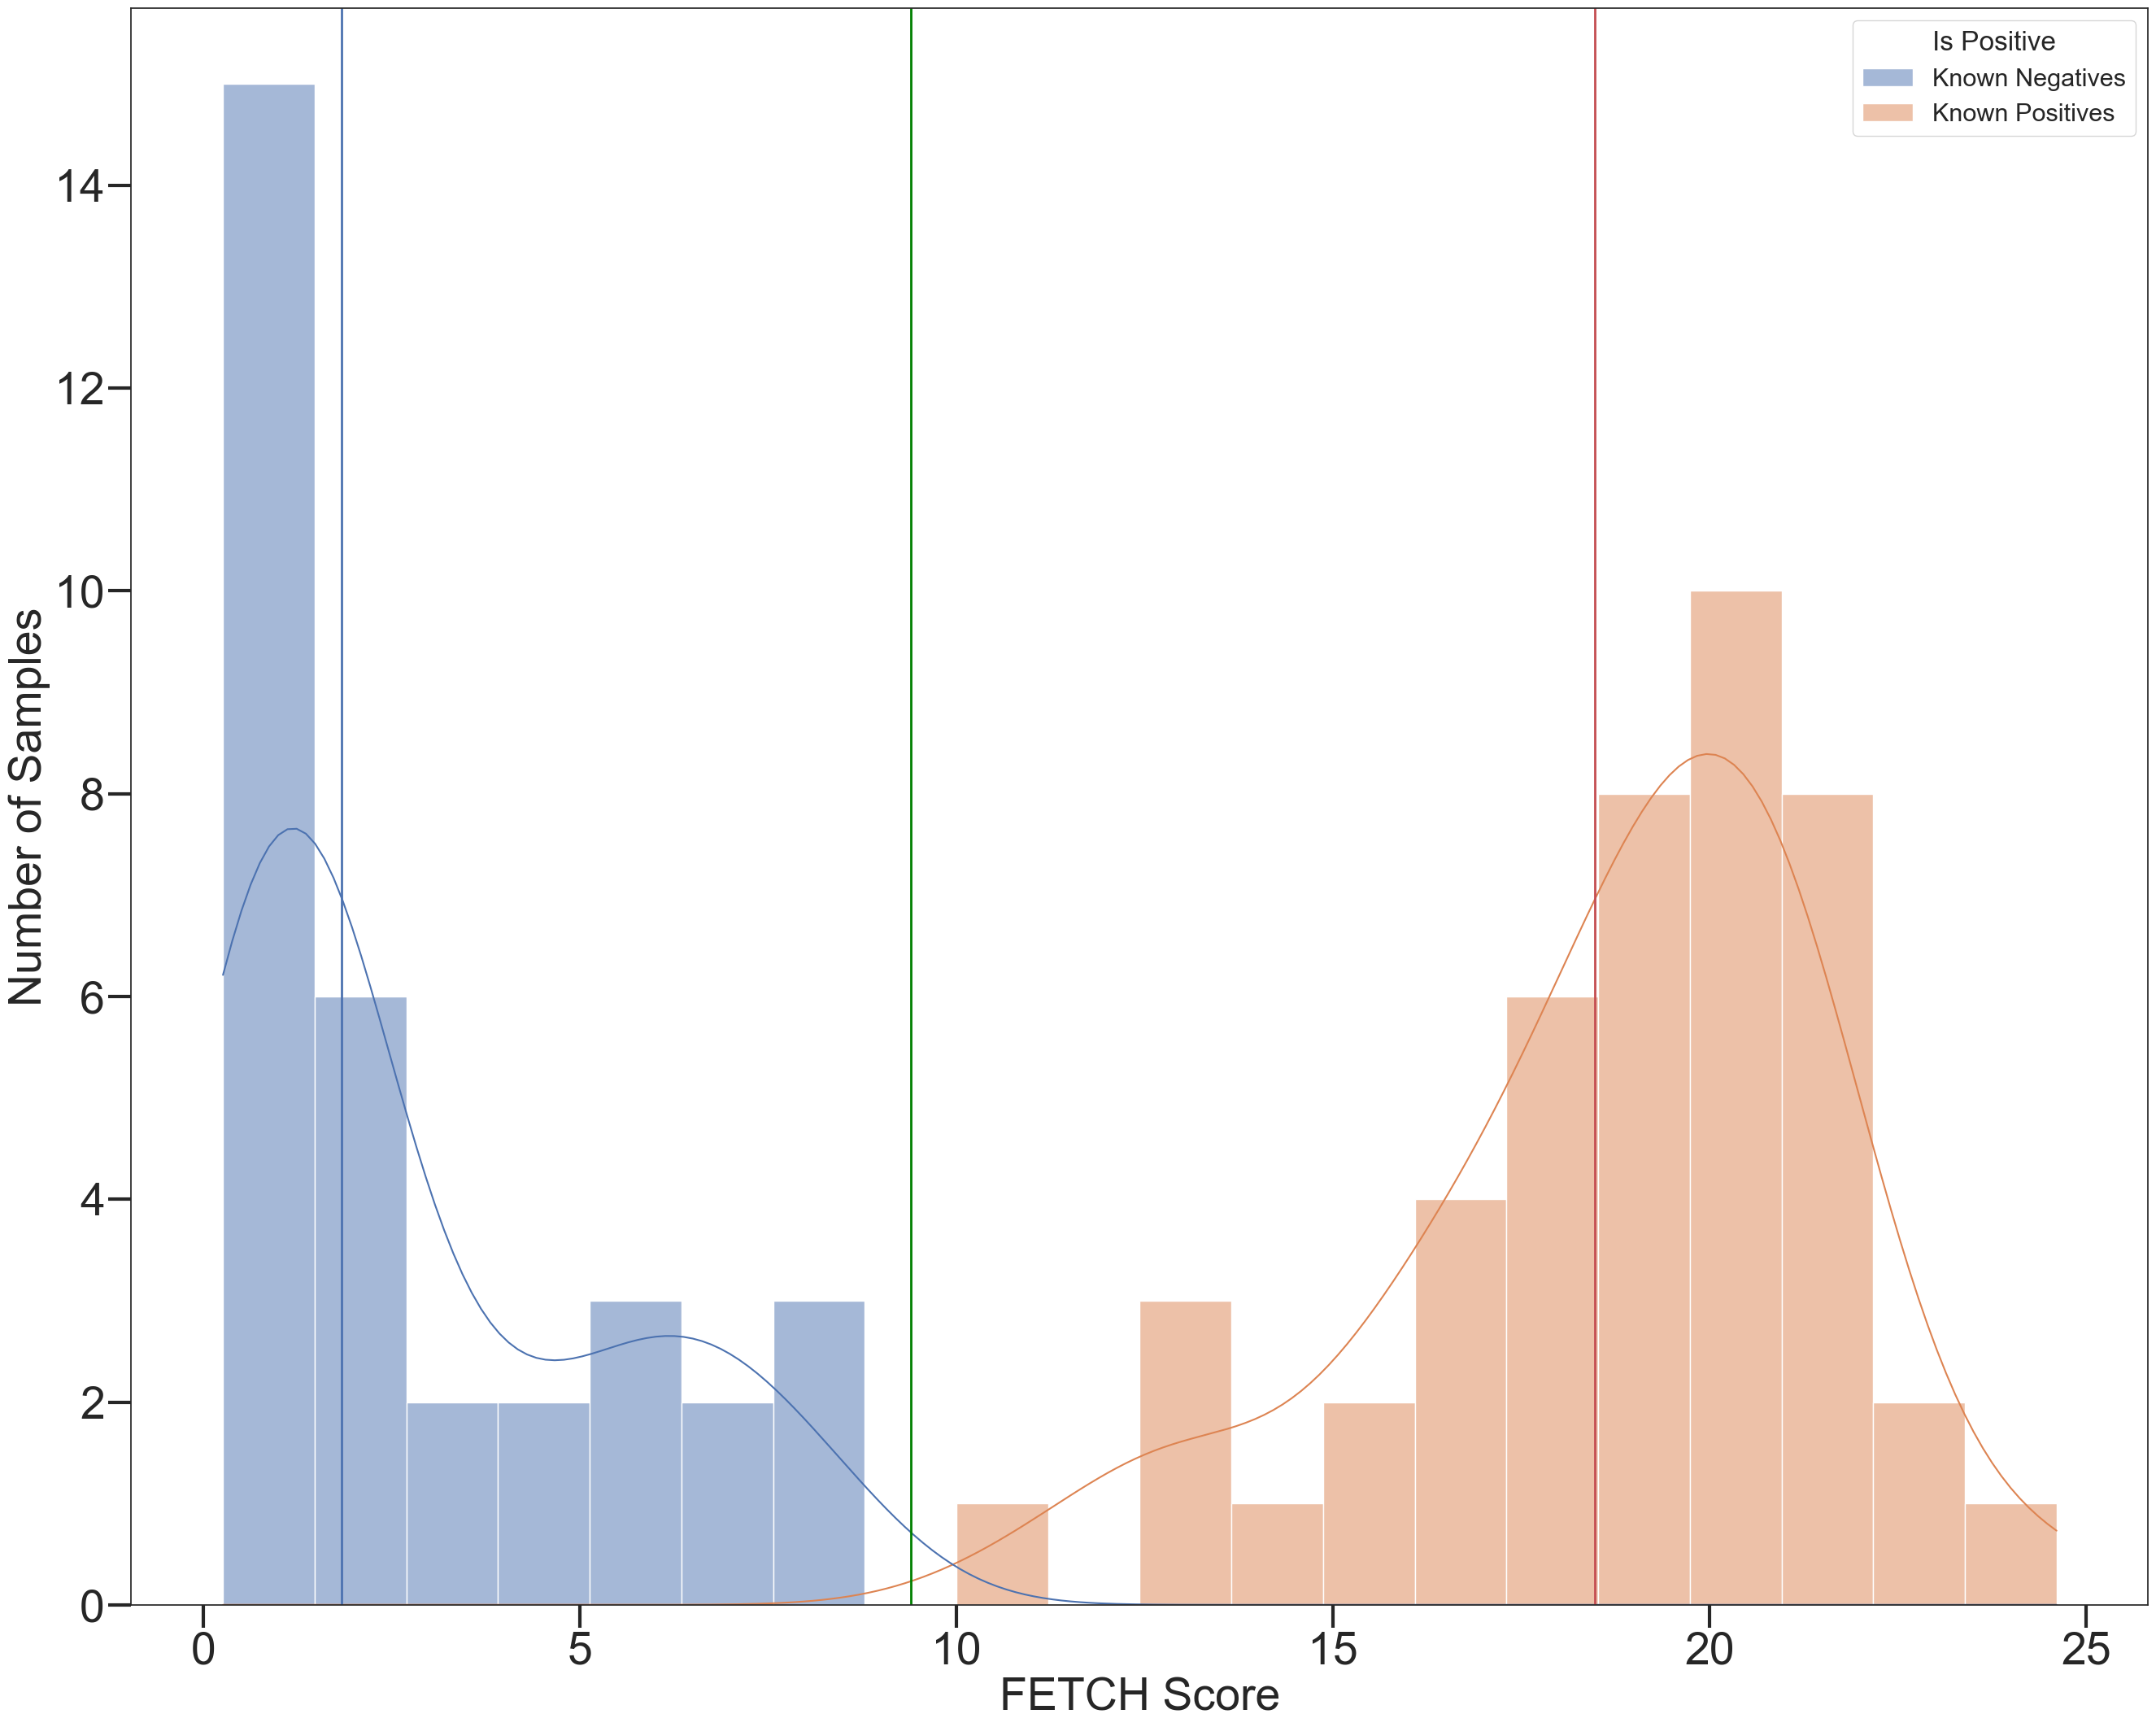

In [21]:
#A figure for gauging the distribution shape of known posititves and negatives
   
sns.histplot(data=all_together, x="FETCH score", hue="Is Positive", bins=20, kde=True)
ax = plt.gca()
all_negative = [0.001 if x == 0 else x for x in all_negative]
ax.set_xlabel('FETCH Score', fontsize=40)
ax.set_ylabel('Number of Samples', fontsize=40)
pos_mean = pow(np.e, np.log(all_positive).mean())
neg_mean = pow(np.e, np.log(all_negative).mean())
y_pos = pow(np.e, np.log(all_positive).mean() - np.log(all_positive).std()*4)
print('Rough cutoff is: ' + str(y_pos))
ax.tick_params(which='major', length=20, width=3)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40)
ax.axvline(x=pos_mean, linewidth=2, color='r')
ax.axvline(x=neg_mean, linewidth=2, color='b')
ax.axvline(x=y_pos, linewidth=2, color='green')
ax.set(facecolor = "white")
plt.savefig(join("outputs", "Positive-Negative_distr.pdf"), format='pdf', bbox_inches='tight')


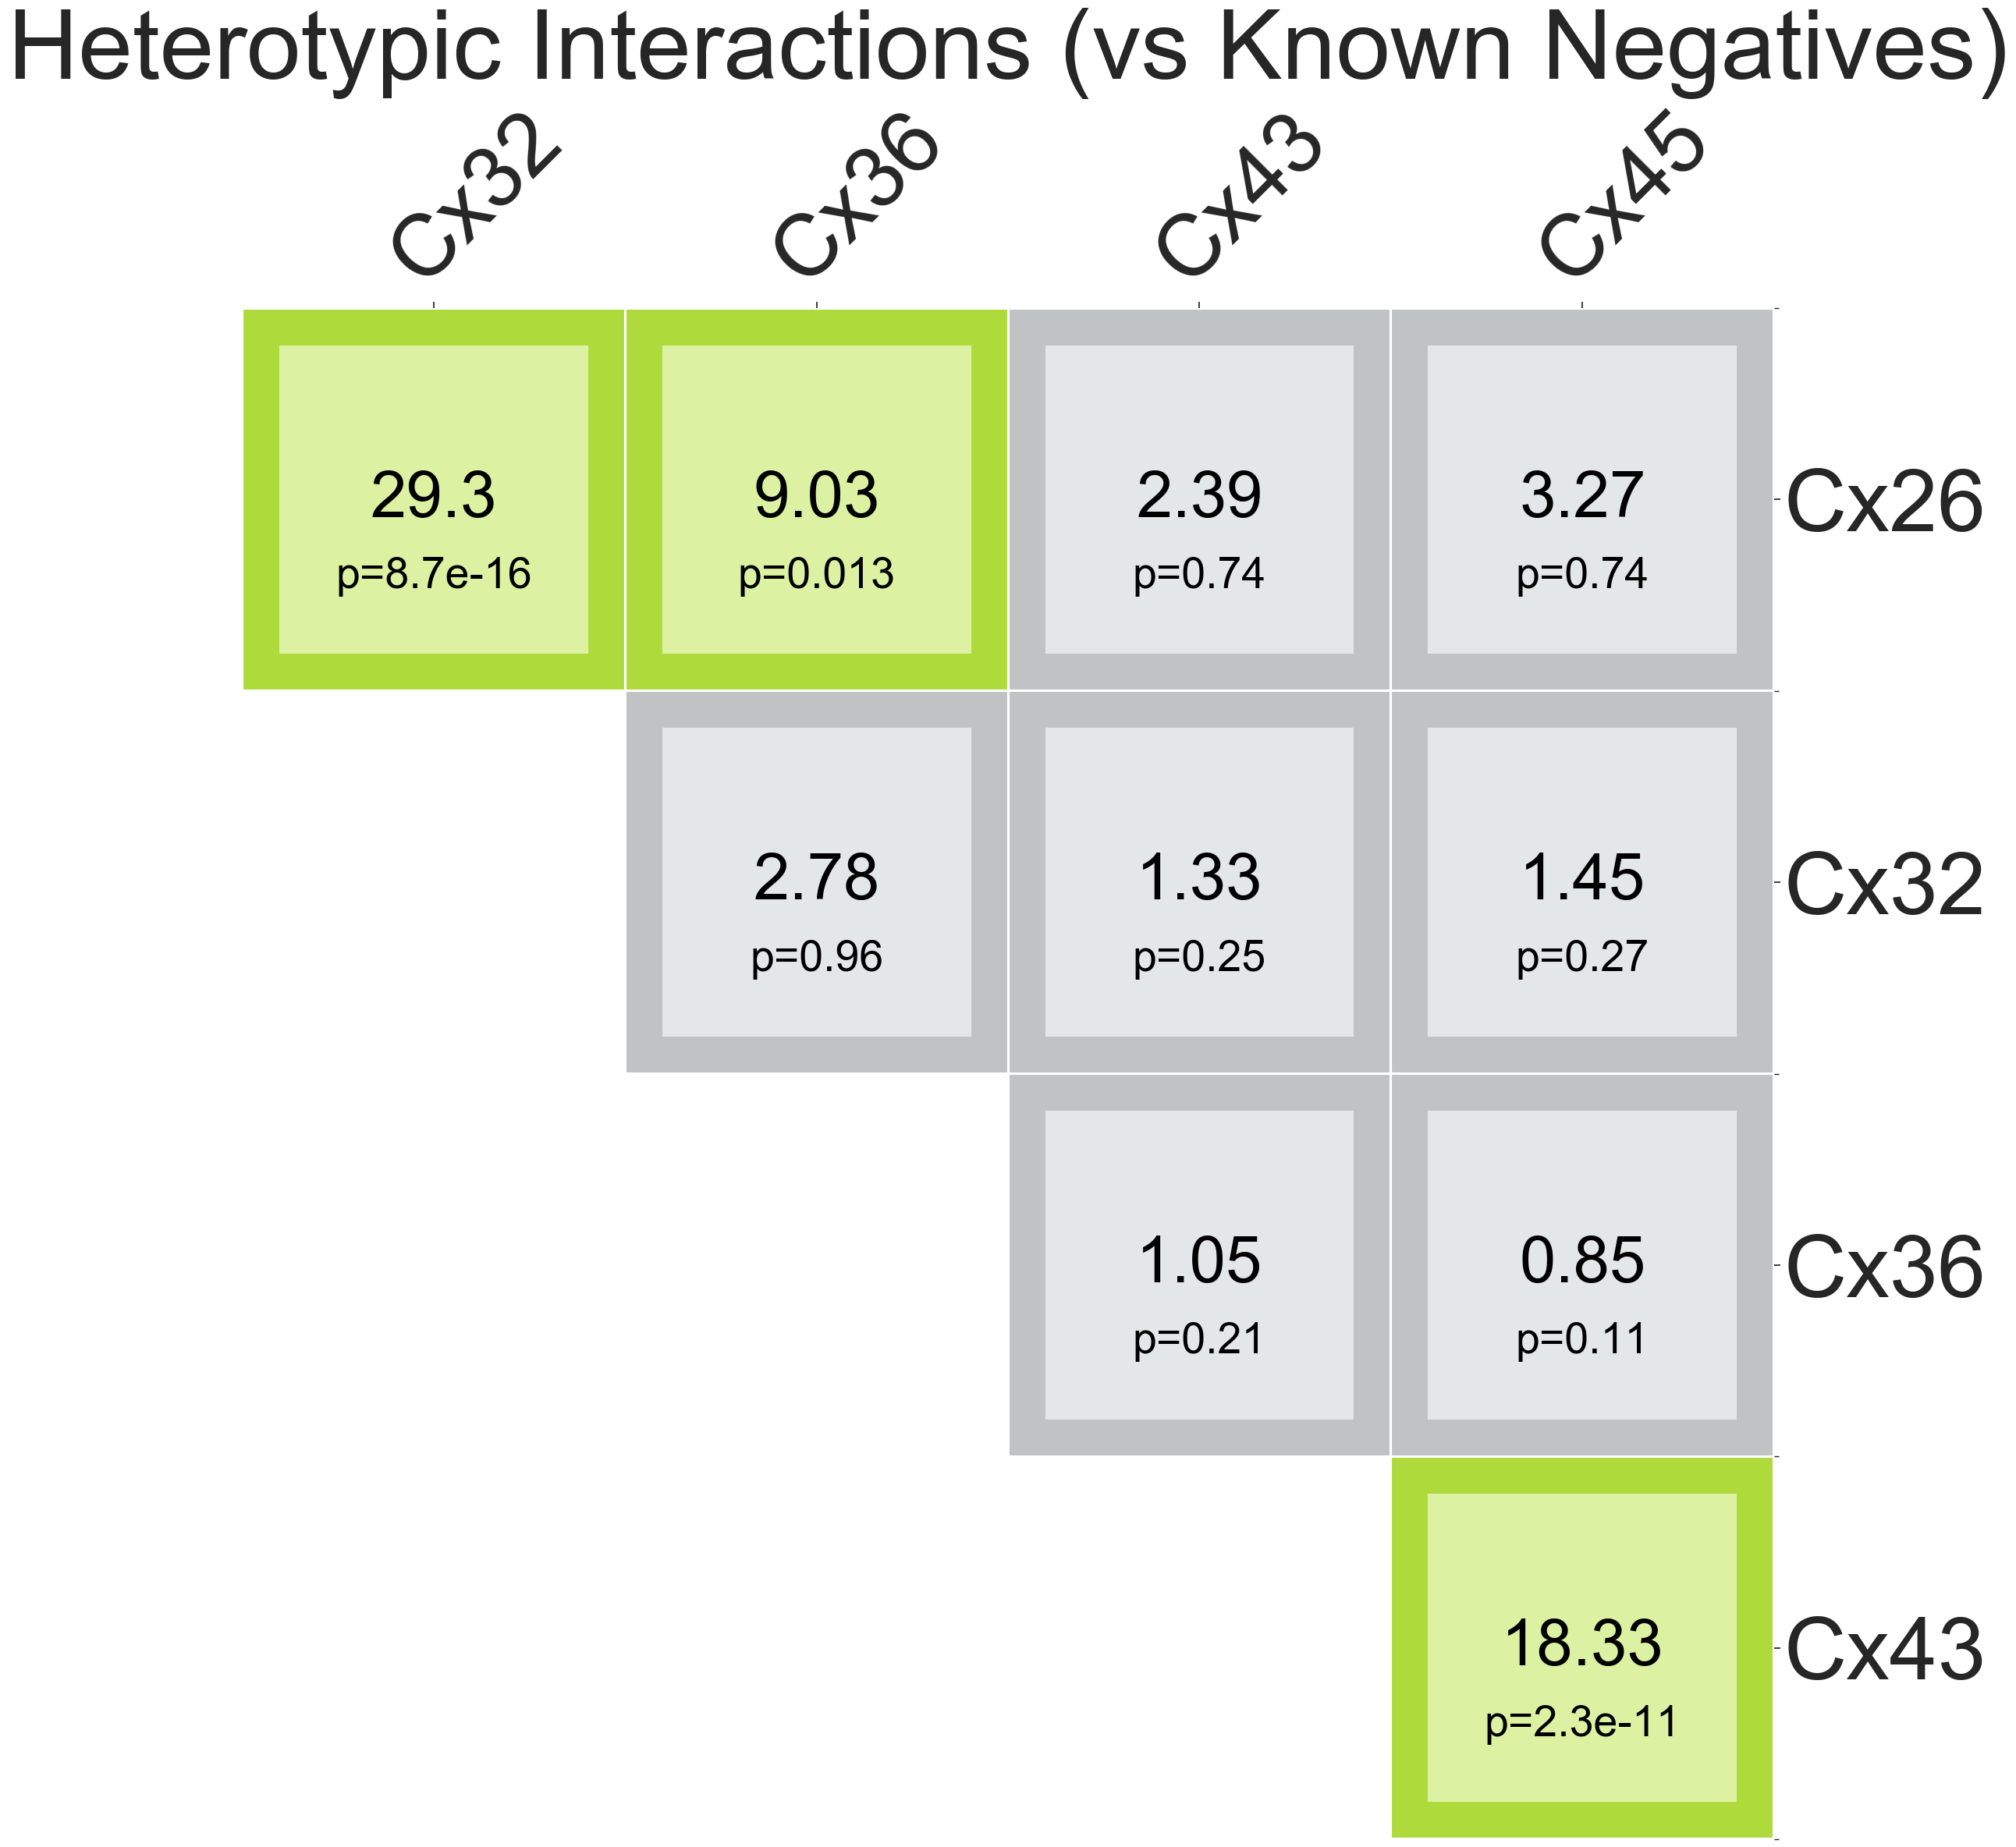

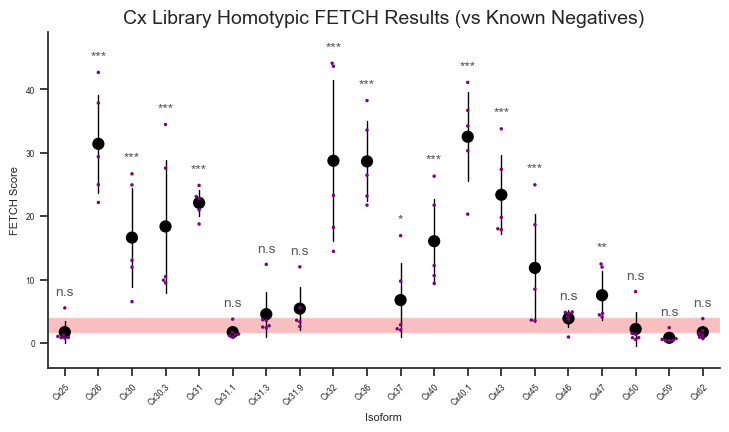

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


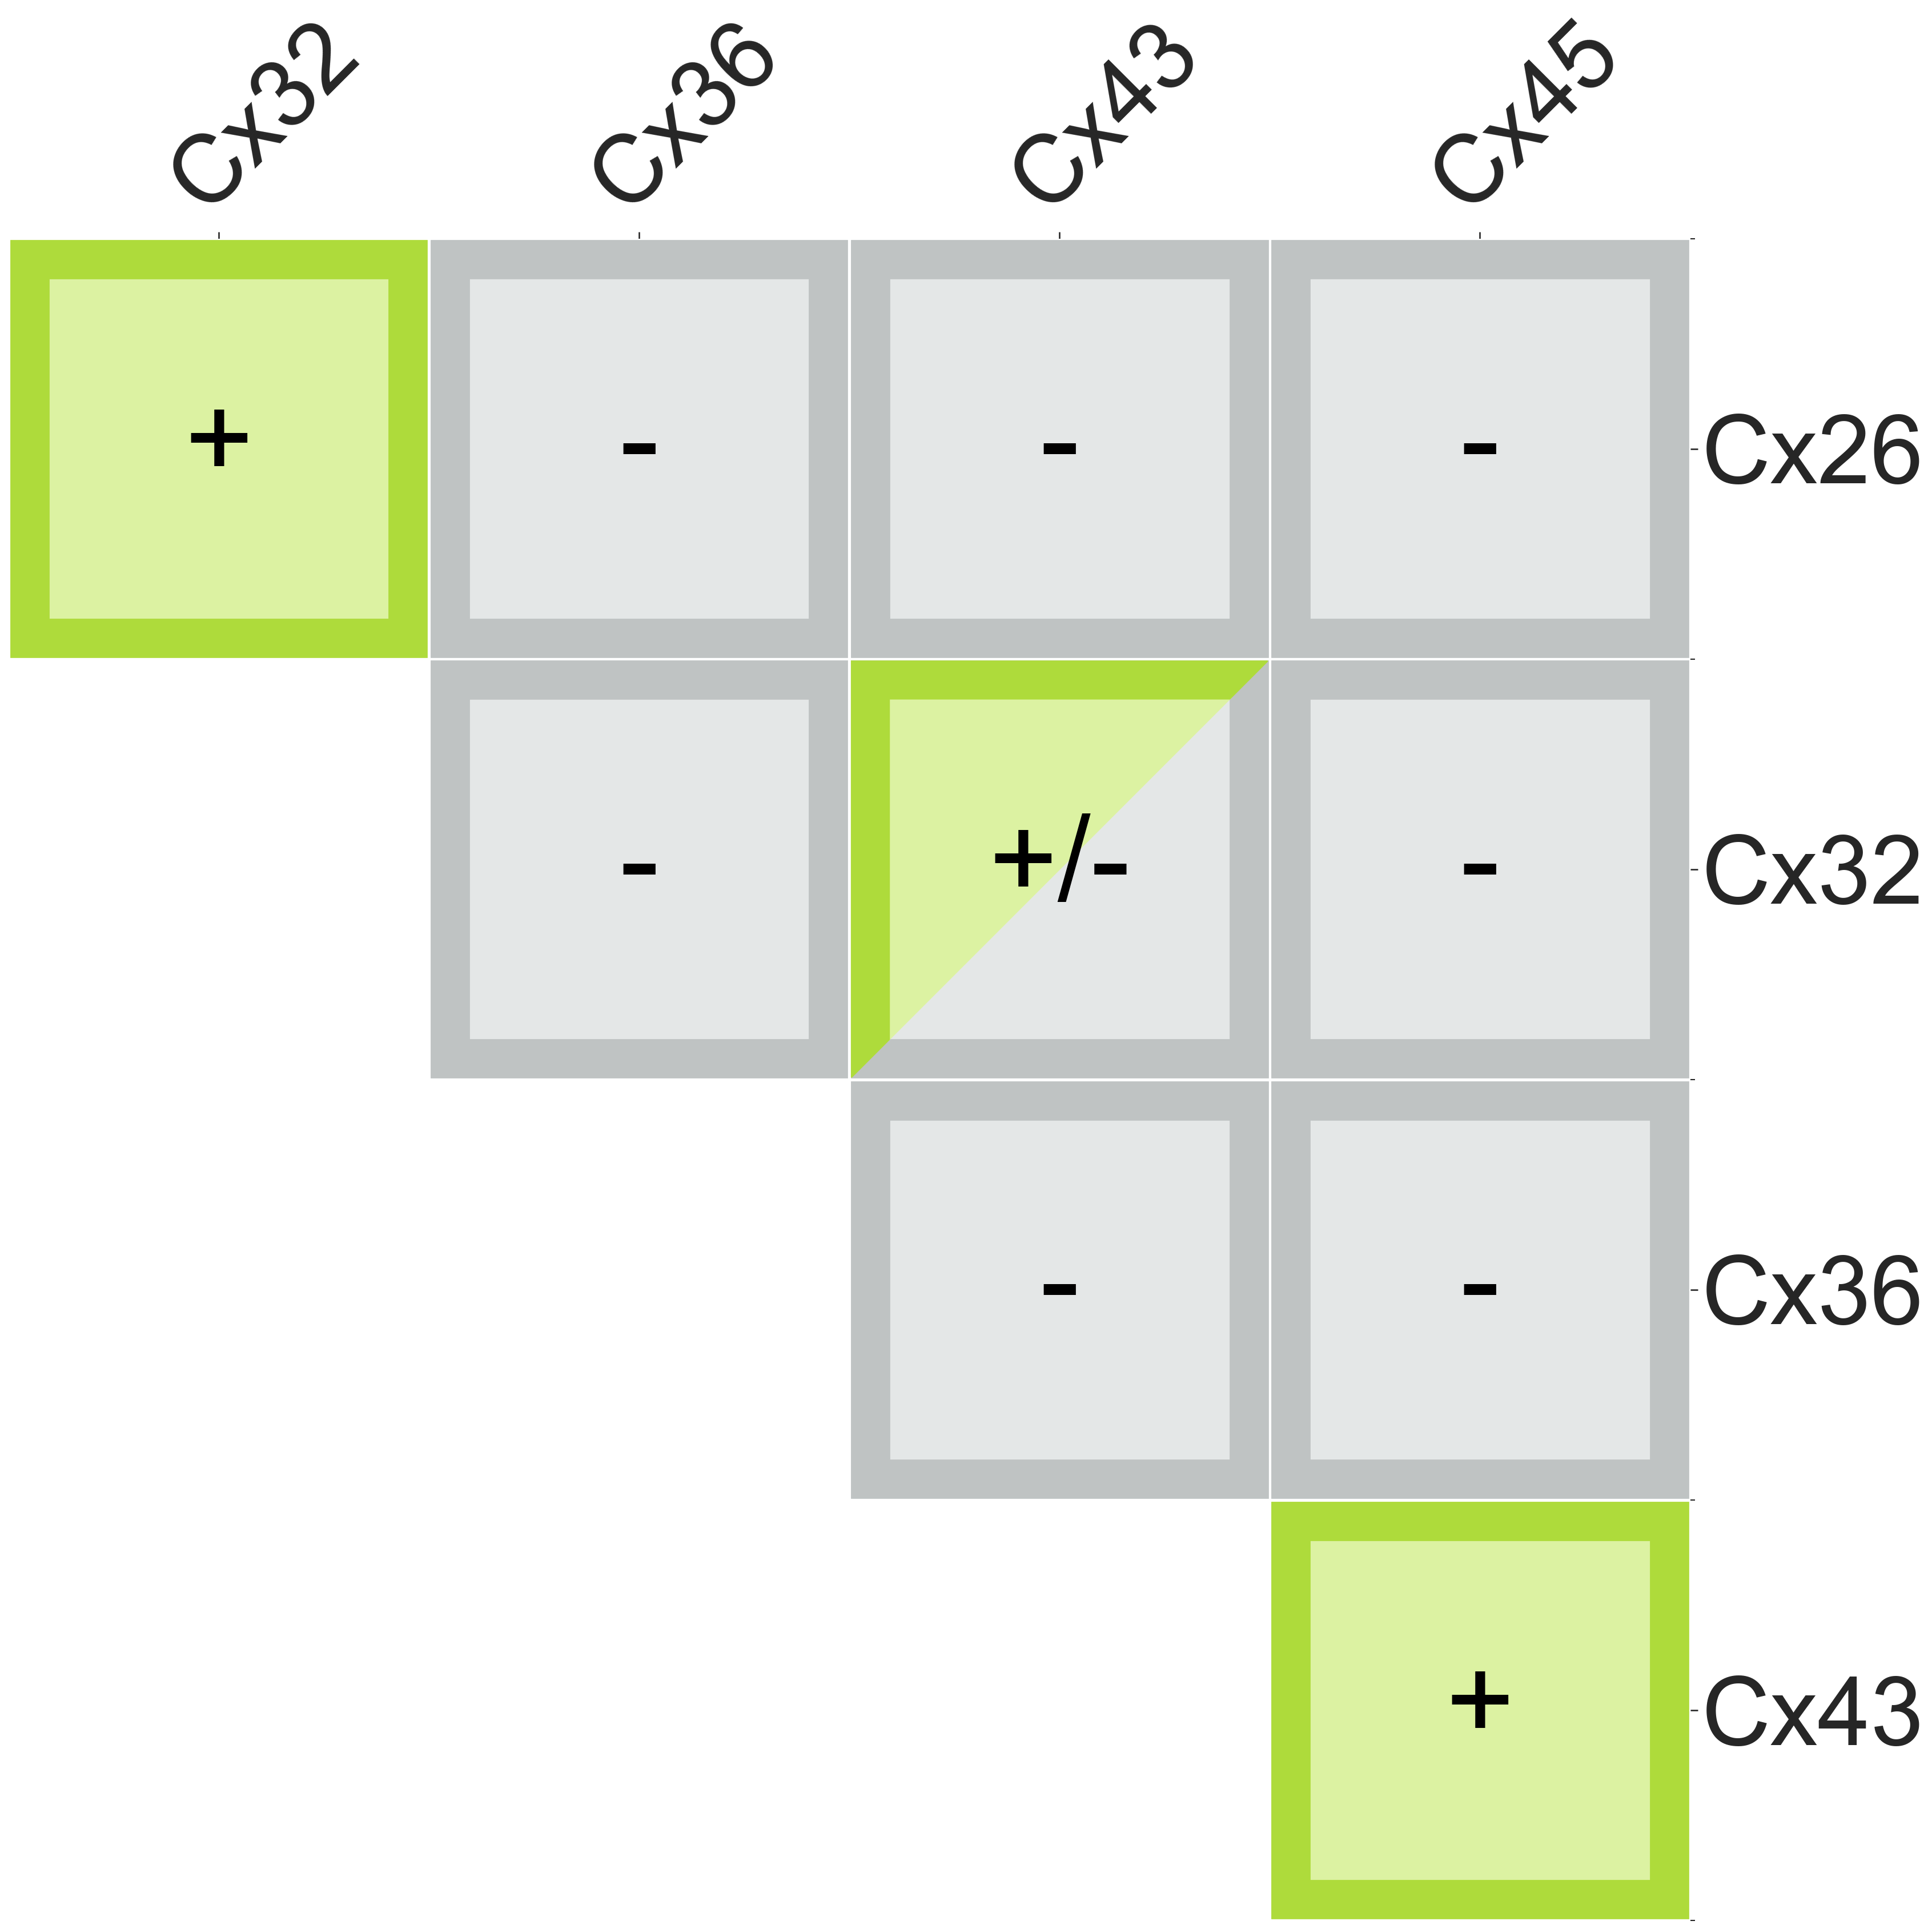

In [162]:
#Three figures in one: heterotypic interacctions, homotypic interactions, and theoretical (from literature) heterotypic interactions

score_df_39 = pd.read_csv(join('data/', 'score_df_39.csv'))
score_df_40 = pd.read_csv(join('data/', 'score_df_40.csv'))
score_df_46 = pd.read_csv(join('data/', 'score_df_46.csv'))
score_df_50 = pd.read_csv(join('data/', 'score_df_50.csv'))
score_df_60 = pd.read_csv(join('data/', 'score_df_60.csv'))
score_df_61 = pd.read_csv(join('data/', 'score_df_61.csv'))
score_df_62 = pd.read_csv(join('data/', 'score_df_62.csv'))
score_df_66 = pd.read_csv(join('data/', 'score_df_66.csv'))


score_df_39_relevant = score_df_39.loc[score_df_39['first_member'] == score_df_39['second_member']]
score_df_66_relevant = score_df_66.loc[(score_df_66['FETCH_id'].str.contains('A') | score_df_66['FETCH_id'].str.contains('B')) & (~score_df_66['first_member'].str.contains('m')) & ~((score_df_66['FETCH_id'] == 'A12') | (score_df_66['FETCH_id'] == 'B12'))]

frames = [score_df_39_relevant, score_df_40, score_df_60, score_df_61, score_df_62, score_df_66_relevant]
merger = pd.concat(frames)
merger = merger.loc[~(merger['first_member'] == 'Cx23')]
merger = merger.loc[~(merger['first_member'].str.contains('m'))]
merger.to_csv(join("outputs", 'cx_library_homotypic.csv'))
merger = merger.sort_values(by=['first_member'])
colors = ["black" for i in range(merger["first_member"].unique().shape[0])]
labels = list(merger['first_member'].unique())
ll = len(labels)
pvals = []
for i in range(len(labels)):
    t, p = scipy.stats.ttest_ind(merger.loc[merger['first_member'] == labels[i]]['FETCH score'], all_negative)
    pvals.append(p)

outer_gray = (191/255, 195/255, 195/255, 1.0)
outer_green = (174/255, 219/255, 59/255, 1.0)

score_df_39_relevant = score_df_39.loc[score_df_39['first_member'] != score_df_39['second_member']]
score_df_46_relevant = score_df_46.loc[(score_df_46['first_member'] != score_df_46['second_member']) & (~score_df_46['first_member'].str.contains('m'))]
score_df_50_relevant = score_df_50.loc[(score_df_50['first_member'] != score_df_50['second_member']) & (~score_df_50['first_member'].str.contains('m'))]
score_df_66_relevant = score_df_66.loc[(score_df_66['FETCH_id'].str.contains('C') | score_df_66['FETCH_id'].str.contains('D') | score_df_66['FETCH_id'].str.contains('E') | score_df_66['FETCH_id'].str.contains('F')) & (~score_df_66['first_member'].str.contains('m')) & ~(score_df_66['FETCH_id'] == 'C09') & ~(score_df_66['first_member'].str.contains('WT'))]

frames = [score_df_39_relevant, score_df_46_relevant, score_df_50_relevant, score_df_66_relevant]
merger2 = pd.concat(frames)

merger2['compound_name'] = merger2['first_member'] + ' vs ' + merger2['second_member']
merger2['compound_name'].unique()
merger2 = merger2.sort_values(by=['compound_name'])
merger2['compound_name'] = merger2['compound_name'].astype(str)
abridged = merger2[['first_member', 'second_member', 'FETCH score', 'compound_name']]
abridged = abridged.groupby(['first_member', 'second_member']).agg({'FETCH score': np.mean, 'compound_name' : lambda x: x.iloc[0]}).reset_index()

unique_first_members = np.array(abridged['first_member'].unique())
unique_second_members = np.array(abridged['second_member'].unique())

scores = np.zeros([unique_first_members.shape[0], unique_second_members.shape[0]])
scores[:] = np.NaN
pvalues  = np.zeros([unique_first_members.shape[0], unique_second_members.shape[0]])
pvalues[:] = np.NaN

comp_names = list(abridged['compound_name'].unique())
for cn in comp_names:
    t, p = scipy.stats.ttest_ind(merger2.loc[merger2['compound_name'] == cn]['FETCH score'], all_negative)
    pvals.append(p)
#FDR correcction for p values of homotypic and heterotypic screens    
rejected, pnew = statsmodels.stats.multitest.fdrcorrection(pvals) 

pvals2 = {}
for i in range(len(pnew) - ll):
    pvals2[comp_names[i]] = pnew[ll + i]
for index, row in abridged.iterrows():
    fm = row['first_member']
    sm = row['second_member']
    fs = row['FETCH score']
    p = pvals2[row['compound_name']]
    scores[np.where(unique_first_members == fm)[0][0], np.where(unique_second_members == sm)[0][0]] = fs
    pvalues[np.where(unique_first_members == fm)[0][0], np.where(unique_second_members == sm)[0][0]] = p
ax1, im1 = triangle_heatmap_og(scores, pvalues, 0, 9, unique_first_members, unique_second_members)
ax1.set_title("Heterotypic Interactions (vs Known Negatives)", size = 90)
plt.savefig(join("outputs", "Heterotypic_Library_heatmap (vs Known Negatives).pdf"), format='pdf', bbox_inches='tight')
plt.show()

#Finish homotypic axis with corrected p-vals:
sns.set_style('ticks')
sns.catplot(x="first_member", y="FETCH score", kind="point", ci="sd", palette=colors, data=merger, s=3, height=4.5, aspect=0.09*len(list(merger['first_member'].unique())))
ax = plt.gca()
for line in ax.lines:
    line.set_linewidth(1)
    line.set_color('black')
    line.set_zorder(0)
g = sns.swarmplot(x="first_member", y="FETCH score", data=merger, color="purple", s=2.5)

ax.set_xlabel('Isoform', fontsize=8)
ax.set_ylabel('FETCH Score', fontsize=8)
ax.set_title("Cx Library Homotypic FETCH Results (vs Known Negatives)", fontsize=14)
        
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=6)
plt.setp(ax.get_yticklabels(), fontsize=6)
plt.axhspan(negative_conf[0], negative_conf[1], facecolor='lightcoral', alpha=0.5, zorder=0)
ax.set_ylim([-4,merger['FETCH score'].max() + 5])
plt.margins(y=0)
y_tick_vals = np.arange(0, merger['FETCH score'].max(), 10)
y_tick_vals = [round(i, 1) for i in y_tick_vals]
plt.yticks(y_tick_vals)

for i in range(len(labels)):
    p = pnew[i]
    y, col = merger.loc[merger['first_member'] == labels[i]]['FETCH score'].max() + 1, '#5b5b5b'
    if p > 0.05:
        plt.text(i, y+0.5, "n.s", ha='center', va='bottom', color=col, fontsize=10)
    elif p <= 0.05 and p > 0.01:
        plt.text(i, y+0.5, "*", ha='center', va='bottom', color=col, fontsize=10)
    elif p <= 0.01 and p > 0.001:
        plt.text(i, y+0.5, "**", ha='center', va='bottom', color=col, fontsize=10)
    else:
        plt.text(i, y+0.5, "***", ha='center', va='bottom', color=col, fontsize=10)  
    
plt.savefig(join("outputs", "Homotypic Cx library (vs Known Negatives).pdf"), format='pdf', bbox_inches='tight')
plt.show()
plt.rcParams['figure.figsize'] = (32,26)
plt.rcParams['figure.dpi'] = 150
sns.set(font_scale=2)

plt.cla()
plt.clf()

## Theoretical ones:
texts = np.empty([unique_first_members.shape[0], unique_second_members.shape[0]], dtype='<U16')
texts[:] = np.NaN
texts[np.where(unique_first_members == 'Cx26')[0][0], np.where(unique_second_members == 'Cx32')[0][0]] = '+'
texts[np.where(unique_first_members == 'Cx32')[0][0], np.where(unique_second_members == 'Cx43')[0][0]] = '+/-'
texts[np.where(unique_first_members == 'Cx43')[0][0], np.where(unique_second_members == 'Cx45')[0][0]] = '+'
negative_pairs = [['Cx36', 'Cx26'], ['Cx36', 'Cx32'], ['Cx43', 'Cx26'], ['Cx43', 'Cx36'], ['Cx45', 'Cx26'], ['Cx45', 'Cx32'], ['Cx45', 'Cx36']]
for pair in negative_pairs:
    texts[np.where(unique_first_members == pair[1])[0][0], np.where(unique_second_members == pair[0])[0][0]] = '-' 

#tweak scores for dummy figure
fake_pvalues = np.copy(pvalues)
fake_pvalues[0, 1] = 1
ax2, im2 = triangle_heatmap_og(scores, fake_pvalues, texts, 9, unique_first_members, unique_second_members)
ax2.add_patch(Polygon([[2-0.41, 1+0.41], [2-0.41, 1-0.41], [2+0.41, 1-0.41]], color = (220/255, 242/255, 162/255, 1.0), closed= True))
ax2.add_patch(Polygon([[2-0.495, 1+0.495], [2-0.495, 1-0.495], [2+0.495, 1-0.495], [2+0.405, 1-0.405], [2-0.405, 1-0.405], [2-0.405, 1+0.405]], color = outer_green, closed= True, fill=True))

ax1.set_title("Heterotypic Interactions", size = 50)
plt.savefig(join("outputs", "Heterotypic_Library_heatmap_literature.pdf"), format='pdf', bbox_inches='tight')
plt.show()


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


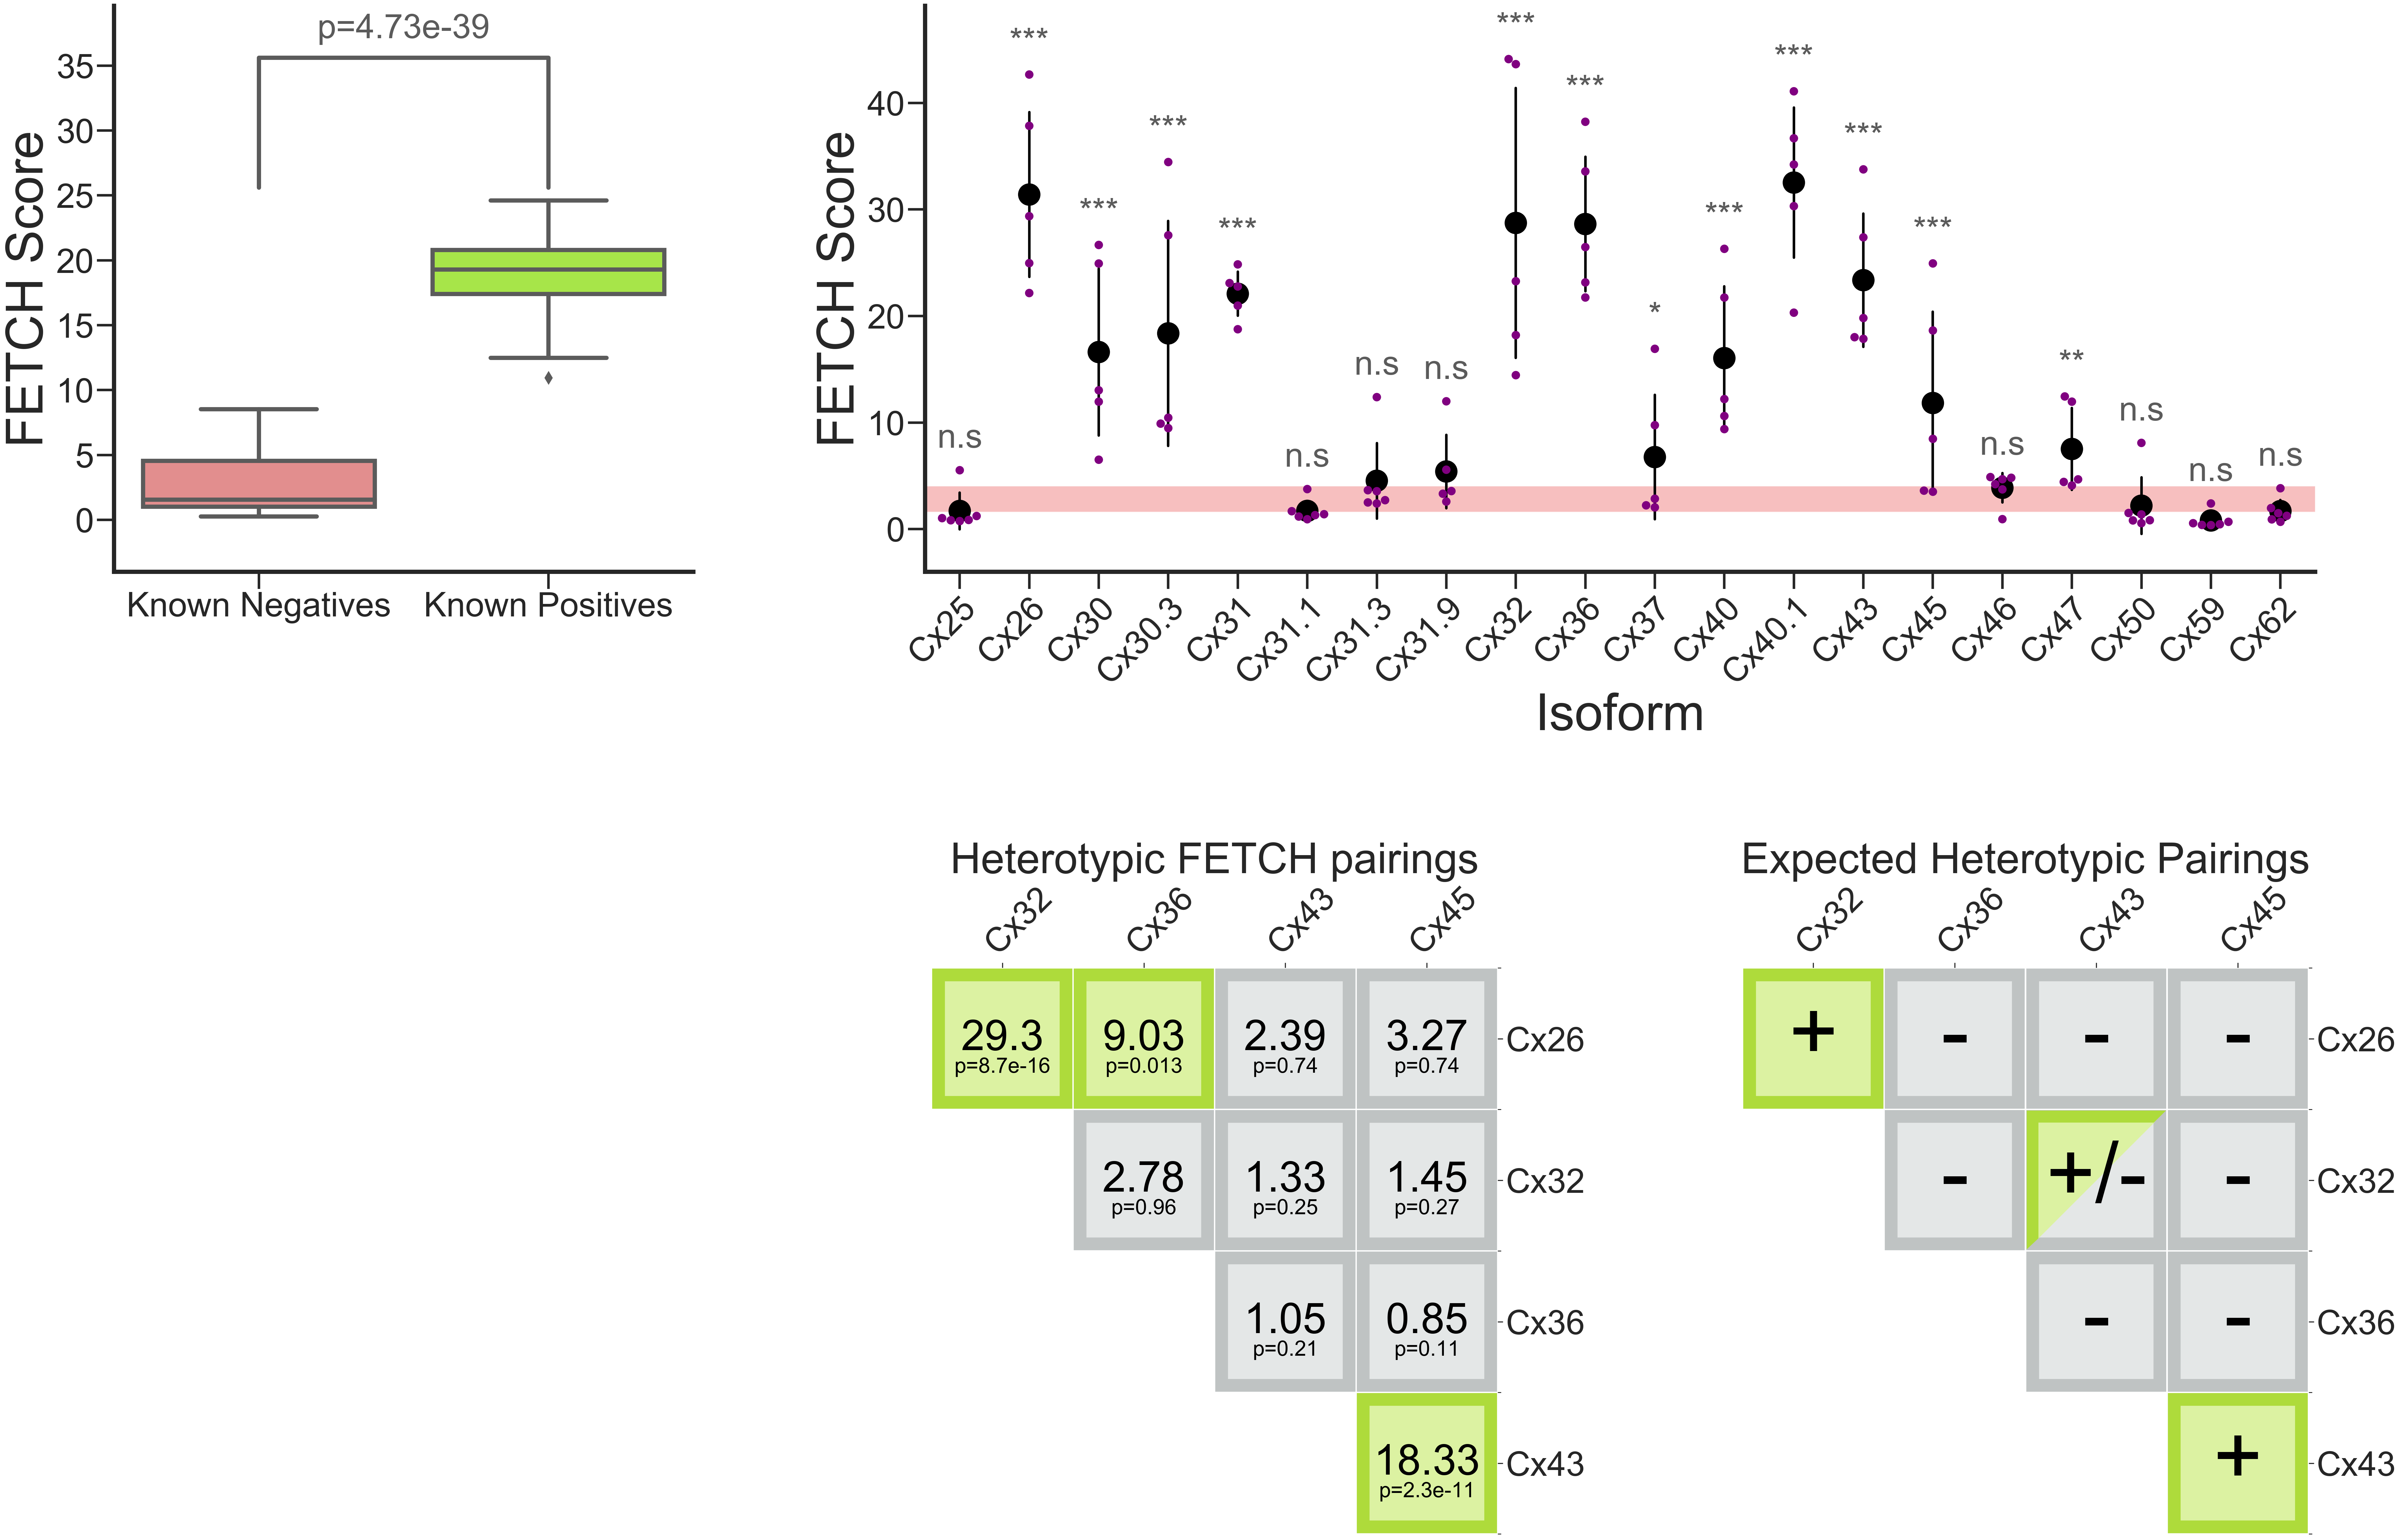

In [166]:
fig3 = plt.figure(constrained_layout=False, figsize=(45, 25), dpi=200)
# plt.rcParams['figure.figsize'] = (64,30)
# plt.rcParams['figure.dpi'] = 200
gs = fig3.add_gridspec(2, 3)

ax1 = fig3.add_subplot(gs[0, :1])
ax2 = fig3.add_subplot(gs[0, 1:])
ax3 = fig3.add_subplot(gs[1, 1:2])
ax4 = fig3.add_subplot(gs[1, 2:])
ax1.set(facecolor = "white")
ax2.set(facecolor = "white")
ax3.set(facecolor = "white")
ax4.set(facecolor = "white")

axlable_size = 60
ticklabel_size = 40
axis_thickness = 5
title_size = 50


# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 3, 1, 1]})
# fig.suptitle('Sharing x per column, y per row')

#First plot
t, p = scipy.stats.ttest_ind(all_positive, all_negative)
colors = {'Known Negatives' : 'lightcoral', 'Known Positives' : 'greenyellow'}
sns.set_style('ticks')
sns.boxplot(x="Is Positive", y="FETCH score", data=all_together, palette=colors, linewidth=5, fliersize=10, ax=ax1)
sns.despine(ax=ax1, top=True, right=True, left=False, bottom=False)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(axis_thickness)
ax1.set_xlabel('')
ax1.set_ylabel('FETCH Score', fontsize=axlable_size)
# ax1.set_title("Defining Positive/Negative FETCH Results", fontsize=axlable_size)
ax1.set_ylim([-4,all_together['FETCH score'].max() + 15])
ax1.tick_params(which='major', length=20, width=3)
plt.setp(ax1.get_xticklabels(), fontsize=ticklabel_size)
plt.setp(ax1.get_yticklabels(), fontsize=ticklabel_size)
x1, x2 = 0, 1   # columns
y, h, col = all_together['FETCH score'].max() + 1, 10, '#5b5b5b'
ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
ax1.text((x1+x2)*.5, y+h+1, "p=" + str("%.3g" % p), ha='center', va='bottom', color=col, fontsize=ticklabel_size)

#Second plot
colors = ["black" for i in range(merger["first_member"].unique().shape[0])]
sns.set_style('ticks')
sns.pointplot(x="first_member", y="FETCH score", ax=ax2, ci="sd", palette=colors, data=merger, scale = 3, height=1, aspect=0.09*len(list(merger['first_member'].unique())))
for line in ax2.lines:
    line.set_linewidth(3)
    line.set_color('black')
    line.set_zorder(0)
g = sns.swarmplot(x="first_member", y="FETCH score", data=merger, color="purple", s=10, ax=ax2)
sns.despine(ax=ax2, top=True, right=True, left=False, bottom=False)
ax2.set_xlabel('Isoform', fontsize=axlable_size)
ax2.set_ylabel('FETCH Score', fontsize=axlable_size)
ax2.tick_params(which='major', length=20, width=3)
# ax2.set_title("Cx Library Homotypic FETCH Results (vs Known Negatives)", fontsize=14)      
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=ticklabel_size)
plt.setp(ax2.get_yticklabels(), fontsize=ticklabel_size)
ax2.axhspan(negative_conf[0], negative_conf[1], facecolor='lightcoral', alpha=0.5, zorder=0)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(axis_thickness)
ax2.set_ylim([-4,merger['FETCH score'].max() + 5])
plt.margins(y=0)
y_tick_vals = np.arange(0, merger['FETCH score'].max(), 40)
y_tick_vals = [round(i, 1) for i in y_tick_vals]
plt.yticks(y_tick_vals)
for i in range(len(labels)):
    p = pnew[i]
    y, col = merger.loc[merger['first_member'] == labels[i]]['FETCH score'].max() + 1, '#5b5b5b'
    if p > 0.05:
        ax2.text(i, y+0.5, "n.s", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    elif p <= 0.05 and p > 0.01:
        ax2.text(i, y+0.5, "*", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    elif p <= 0.01 and p > 0.001:
        ax2.text(i, y+0.5, "**", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    else:
        ax2.text(i, y+0.5, "***", ha='center', va='bottom', color=col, fontsize=ticklabel_size)  
# plt.savefig(join("outputs", "Homotypic Cx library (vs Known Negatives).pdf"), format='pdf', bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (32,26)
# plt.rcParams['figure.dpi'] = 150
# sns.set(font_scale=2)
# plt.cla()
# plt.clf()

#Third plot:
triangle_heatmap(scores, pvalues, 0, 9, unique_first_members, unique_second_members, ax=ax3)
ax3.set_title("Heterotypic FETCH pairings", size = title_size)

#Fourth plot
triangle_heatmap(scores, fake_pvalues, texts, 9, unique_first_members, unique_second_members, ax=ax4)
ax4.add_patch(Polygon([[2+0.405, 1-0.410], [2-0.412, 1-0.410], [2-0.412, 1+0.410]], color = (220/255, 242/255, 162/255, 1.0), closed= True))
ax4.add_patch(Polygon([[2-0.489, 1+0.482], [2-0.489, 1-0.489], [2+0.4848, 1-0.489], [2+0.405, 1-0.410], [2-0.412, 1-0.410], [2-0.412, 1+0.410]], color = outer_green, closed= True, fill=True))

ax4.set_title("Expected Heterotypic Pairings", size = title_size)

plt.subplots_adjust(left=0.1,
                    bottom=5, 
                    right=0.9, 
                    top=6, 
                    wspace=0.4, 
                    hspace=0.7)
plt.savefig(join("outputs", "Figure3.pdf"), format='pdf', bbox_inches='tight')
plt.show()


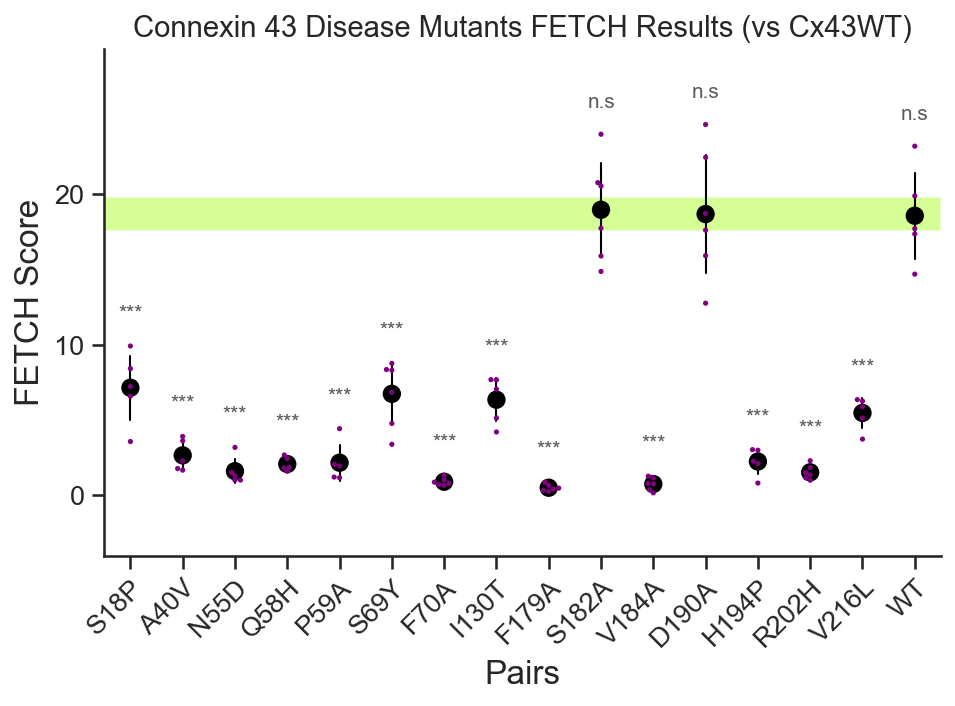

In [176]:
#A figure summarizing Cx43 disease-assocciated mutations 
score_df_46 = pd.read_csv(join('data/', 'score_df_46.csv'))
score_df_50 = pd.read_csv(join('data/', 'score_df_50.csv'))
score_df_60 = pd.read_csv(join('data/', 'score_df_60.csv'))
score_df_61 = pd.read_csv(join('data/', 'score_df_61.csv'))
score_df_62 = pd.read_csv(join('data/', 'score_df_62.csv'))
score_df_66 = pd.read_csv(join('data/', 'score_df_66.csv'))
score_df_67 = pd.read_csv(join('data/', 'score_df_67.csv'))
mutant43_disambig = pd.read_csv(join('data/', 'mutant43_disambig.csv'))

score_df_46_relevant = score_df_46.loc[(score_df_46['first_member'].str.contains('m') & score_df_46['second_member'].str.contains('m')) | (score_df_46['first_member'].str.contains('WT') & score_df_46['second_member'].str.contains('WT'))]
score_df_50_relevant = score_df_50.loc[score_df_50['first_member'].str.contains('m') & score_df_50['second_member'].str.contains('m') | (score_df_50['first_member'].str.contains('WT') & score_df_50['second_member'].str.contains('WT'))]
score_df_60_relevant = score_df_60.loc[score_df_60['first_member'].str.contains('Cx43') & score_df_60['second_member'].str.contains('m')]
score_df_61_relevant = score_df_61.loc[score_df_61['first_member'].str.contains('Cx43') & score_df_61['second_member'].str.contains('m')]
score_df_62_relevant = score_df_62.loc[score_df_62['first_member'].str.contains('Cx43') & score_df_62['second_member'].str.contains('m')]
score_df_66_relevant = score_df_66.loc[((score_df_66['first_member'].str.contains('m')) | (score_df_66['FETCH_id'].str.contains('D') | score_df_66['FETCH_id'].str.contains('E') | score_df_66['FETCH_id'].str.contains('F')) & ((score_df_66['first_member'] == 'Cx43WT') & (score_df_66['second_member'] == 'Cx43WT')))]

frames = [score_df_46_relevant, score_df_50_relevant, score_df_60_relevant, score_df_61_relevant, score_df_62_relevant, score_df_66_relevant, score_df_67]
mut_merger = pd.concat(frames)
mut_merger['first_member'] = mut_merger['first_member'].apply(lambda x: x.replace("-", ""))
mut_merger['second_member'] = mut_merger['second_member'].apply(lambda x: x.replace("-", ""))

mut_merger = pd.merge(mut_merger, mutant43_disambig, how="left", on="first_member")
mut_merger['mutation'] = mut_merger['mutation'].fillna('WT')
mut_merger['compound_name'] = mut_merger['first_member'] + ' vs ' + mut_merger['second_member']
mut_merger = mut_merger.sort_values(by=['compound_name'])
mut_merger['compound_name'] = mut_merger['compound_name'].astype(str)


mut_colors = ["black" for i in range(mut_merger['first_member'].unique().shape[0])]
mut_merger['mutation_wo_first'] = mut_merger['mutation'].apply(lambda x : x[1:] if (x != 'WT' and len(x) == 5) else ('0' + x[1:] if (x != 'WT' and len(x) < 5) else 'WT'))
mut_merger = mut_merger.sort_values(by=['mutation_wo_first'])
mut_merger.to_csv(join("outputs", '43mutants.csv'))
sns.set_style('ticks')
sns.catplot(x='mutation', y="FETCH score", palette=mut_colors, kind="point", ci="sd", data=mut_merger, s=3, height=4.5, aspect=0.095*len(list(mut_merger['first_member'].unique())))
ax = plt.gca()
for line in ax.lines:
    line.set_linewidth(1)
g = sns.swarmplot(x='mutation', y="FETCH score", data=mut_merger, color="purple", s=2.5)
ax.set_xlabel('Pairs', fontsize=16)
ax.set_ylabel('FETCH Score', fontsize=16)
ax.set_title("Connexin 43 Disease Mutants FETCH Results (vs Cx43WT)", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.axhspan(positive_conf[0], positive_conf[1], facecolor='greenyellow', alpha=0.5, zorder=0)
ax.set_ylim([-4,mut_merger['FETCH score'].max() + 5])
plt.margins(y=0)
labels2 = [item.get_text() for item in ax.get_xticklabels()]
pvals2 = []
for i in range(len(labels2)):
    t, p = scipy.stats.ttest_ind(mut_merger.loc[mut_merger['mutation'] == labels2[i]]['FETCH score'], all_positive_just43)
    pvals2.append(p)
rejected, pnew2 = statsmodels.stats.multitest.fdrcorrection(pvals2)
for i in range(len(labels2)):
    p = pnew2[i]
    y, col = mut_merger.loc[mut_merger['mutation'] == labels2[i]]['FETCH score'].max() + 1, '#5b5b5b'
    if p > 0.05:
        plt.text(i, y+0.5, "n.s", ha='center', va='bottom', color=col, fontsize=10)
    elif p <= 0.05 and p > 0.01:
        plt.text(i, y+0.5, "*", ha='center', va='bottom', color=col, fontsize=10)
    elif p <= 0.01 and p > 0.001:
        plt.text(i, y+0.5, "**", ha='center', va='bottom', color=col, fontsize=10)
    else:
        plt.text(i, y+0.5, "***", ha='center', va='bottom', color=col, fontsize=10)    



plt.savefig(join("outputs", "Cx43 Disease library (vs Cx43WT).pdf"), format='pdf', bbox_inches='tight')
plt.show()
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (32,26)
plt.rcParams['figure.dpi'] = 150
sns.set(font_scale=2)


cn = ['Condition', 'P-value (before correction)', 'P-value (FDR-correccted)']
m = pd.DataFrame(columns = cn)
m['Condition'] = list(labels) + list(comp_names) + list(labels2)
m['P-value (before correction)'] = pvals + pvals2
m['P-value (FDR-correccted)'] = list(pnew) + list(pnew2)
m.to_csv(join("outputs", 'P-Values Summary.csv'))


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


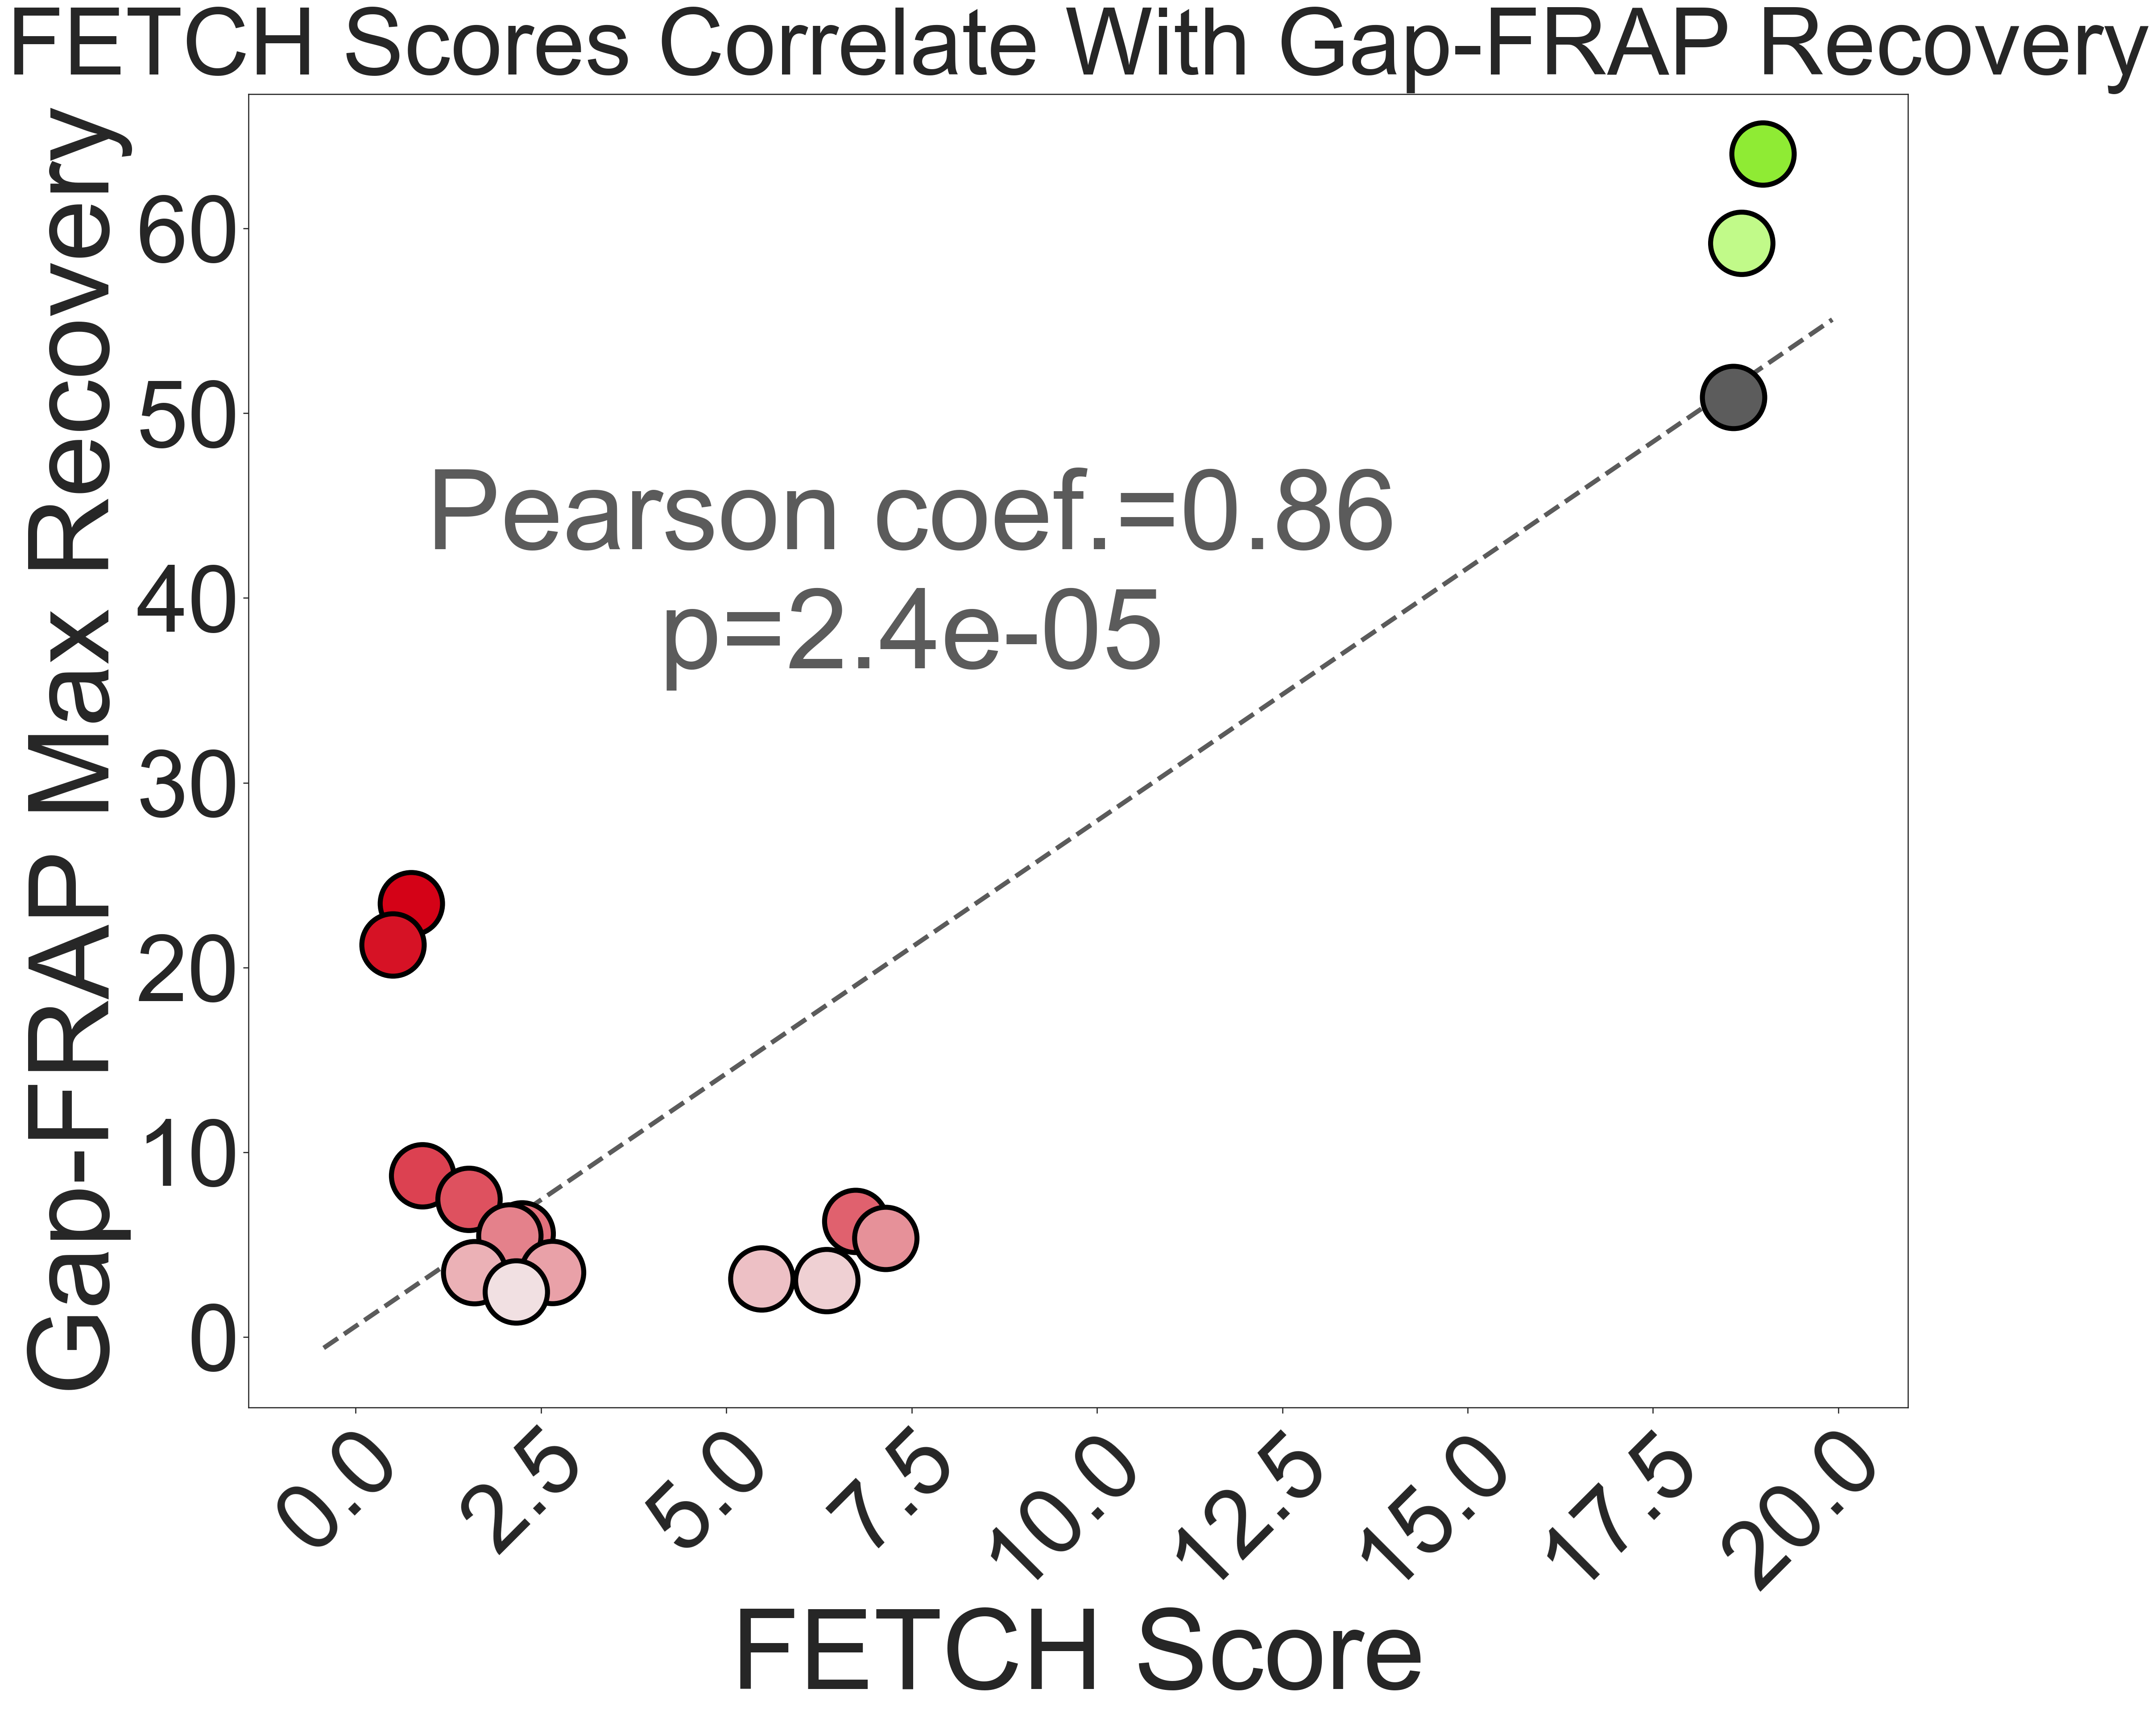

In [184]:
#A figure demonstrating correlation b/w Gap-FRAP sccore and FETCH score for the Cx43 disease mutants

score_df_46 = pd.read_csv(join('data/', 'score_df_46.csv'))
score_df_50 = pd.read_csv(join('data/', 'score_df_50.csv'))
score_df_60 = pd.read_csv(join('data/', 'score_df_60.csv'))
score_df_61 = pd.read_csv(join('data/', 'score_df_61.csv'))
score_df_62 = pd.read_csv(join('data/', 'score_df_62.csv'))
score_df_66 = pd.read_csv(join('data/', 'score_df_66.csv'))
score_df_67 = pd.read_csv(join('data/', 'score_df_67.csv'))
mutant43_disambig = pd.read_csv(join('data/', 'mutant43_disambig.csv'))
FRAP_df = pd.read_csv(join('data/', 'FRAP.csv'))

#Get the Gap-FRAP data
last_frame_before_bleach = 9

excluded_conditions = ['Cx43-m28', 'Untransfected', 'Cx43-WT+Inhibitor', 'DKO6-UNTR', 'Cx43-ELs-Cx26', 'Cx43-ELs-Cx34.7', 'Cx36-WT', 'Cx35-WT', 'Cx36+EtBr', 'RFP+EtBr', 'Cx43-m4']
reduced_df = FRAP_df.loc[~FRAP_df['Biological Condition'].isin(excluded_conditions)].sort_values(by=['Biological Condition'])
reduced_df['Biological Condition'] = reduced_df['Biological Condition'].apply(lambda x: x.replace("-", ""))
reduced_df_out = reduced_df.loc[reduced_df['timepoints'] == reduced_df['timepoints'].max()][['Biological Condition', 'Percent Baseline']]
negative_colors = sns.light_palette('#d40217',reverse=True, n_colors=16)
# color_assignment_reg = {}
# color_assignment_reg['Cx43m18'] = '#56b567'
# color_assignment_reg['Cx43m22'] = '#8ed08b'
# color_assignment_reg['Cx43WT'] = '#5c5c5c'
j = 0
colors = []
pos_mut = ['Cx43m18', 'Cx43m22']

cn = ['Imaging Session', 'Experiment Within Session', 'Unique ID', 'Biological Condition', 'max recovery']
m = pd.DataFrame(columns = cn)
for uid in reduced_df['Unique ID'].unique():
    subframe = reduced_df.loc[reduced_df['Unique ID'] == uid]
    row = pd.DataFrame(columns = cn)
    row['Biological Condition'] = [list(subframe['Biological Condition'])[0]]
    row['max recovery'] = [list(subframe.loc[subframe['timepoints'] == subframe['timepoints'].max()]['Percent Baseline'])[0]]
    frames_t = [m, row]
    m = pd.concat(frames_t) 

m['mean_recovery'] = [m.loc[m["Biological Condition"] == i]["max recovery"].mean() for i in list(m["Biological Condition"])]
# for i, item in enumerate(list(m['Biological Condition'])):
#     if item not in color_assignment_reg.keys():
#         color_assignment_reg[item] = negative_colors[j]
#         j += 1
meandf = reduced_df[['Biological Condition', 'Percent Baseline', 'timepoints']].groupby(['Biological Condition', 'timepoints']).mean().reset_index()
meandf_lastframe = meandf.loc[(meandf['timepoints'] == max(list(meandf['timepoints'].unique())))]
meandf_lastframe = meandf_lastframe.sort_values(by=['Percent Baseline'], ascending=False) 
entries = list(meandf_lastframe['Biological Condition'])

#Now get the FETCH data

score_df_66_relevant = score_df_66.loc[((score_df_66['first_member'].str.contains('m')) | (score_df_66['FETCH_id'].str.contains('D') | score_df_66['FETCH_id'].str.contains('E') | score_df_66['FETCH_id'].str.contains('F')) & ((score_df_66['first_member'] == 'Cx43WT') & (score_df_66['second_member'] == 'Cx43WT')))]
score_df_60_relevant = score_df_60.loc[score_df_60['first_member'].str.contains('Cx43') & score_df_60['second_member'].str.contains('m')]
score_df_61_relevant = score_df_61.loc[score_df_61['first_member'].str.contains('Cx43') & score_df_61['second_member'].str.contains('m')]
score_df_62_relevant = score_df_62.loc[score_df_62['first_member'].str.contains('Cx43') & score_df_62['second_member'].str.contains('m')]
score_df_46_relevant = score_df_46.loc[(score_df_46['first_member'].str.contains('m') & score_df_46['second_member'].str.contains('m')) | (score_df_46['first_member'].str.contains('WT') & score_df_46['second_member'].str.contains('WT'))]
score_df_50_relevant = score_df_50.loc[score_df_50['first_member'].str.contains('m') & score_df_50['second_member'].str.contains('m') | (score_df_50['first_member'].str.contains('WT') & score_df_50['second_member'].str.contains('WT'))]

frames = [score_df_46_relevant, score_df_50_relevant, score_df_60_relevant, score_df_61_relevant, score_df_62_relevant, score_df_66_relevant, score_df_67]
merger = pd.concat(frames)

merger['first_member'] = merger['first_member'].apply(lambda x: x.replace("-", ""))
merger['second_member'] = merger['second_member'].apply(lambda x: x.replace("-", ""))

merger = pd.merge(merger, mutant43_disambig, how="left", on="first_member")
merger['mutation'] = merger['mutation'].fillna('WT')

merger = merger.rename(columns={"first_member": "Biological Condition"})
merger = merger[['Biological Condition', 'FETCH score', 'mutation']]

meandf_merger = merger.groupby(['Biological Condition']).agg({'FETCH score': np.mean, 'mutation' : lambda x: x.iloc[0]}).reset_index()
meandf_merger = pd.merge(meandf_merger, meandf_lastframe, how="inner", on="Biological Condition")
meandf_merger = meandf_merger.sort_values(by=['Percent Baseline'], ascending=False) 
meandf_merger = meandf_merger[["Biological Condition", "FETCH score", "Percent Baseline", "mutation"]]
fetch_array = list(meandf_merger['FETCH score'])
frap_array = list(meandf_merger['Percent Baseline'])
name_array = list(meandf_merger['Biological Condition'])
result = scipy.stats.linregress(fetch_array, frap_array)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue
coef, pval = scipy.stats.pearsonr(fetch_array, frap_array)
sns.set_style('ticks')
colors = ['#8feb34', '#c1fa89', '#5c5c5c', '#d40217', '#d61225', '#dc4151', '#de515f', '#e0616e', '#e2717c', '#e4818b', '#e69199', '#e9a1a8', '#ebb1b6', '#edc0c5', '#efd0d3', '#f1e0e2']

sns.scatterplot(fetch_array, frap_array, s=4500, hue = name_array, palette=colors, edgecolor="black", legend=False)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', c='#5b5b5b', linewidth=5, zorder=0)
plt.text(7.5, 35, "Pearson coef.=" + str("%.2g" % coef) + '\n' + 'p=' + str("%.2g" % pval), ha='center', va='bottom', color=col, fontsize=120)
axes.set_xlabel('FETCH Score', fontsize=120)
axes.set_ylabel('Gap-FRAP Max Recovery', fontsize=120)
axes.set_title("FETCH Scores Correlate With Gap-FRAP Recovery", fontsize=100)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=100)
plt.setp(axes.get_yticklabels(), fontsize=100)
plt.savefig(join("outputs", "Mutants vs FRAP Regression.pdf"), format='pdf', bbox_inches='tight')
plt.show()
meandf_merger = meandf_merger.rename(columns={"FETCH score": "Mean FETCH score", "Percent Baseline" : "FRAP Mean Percent Baseline"})
meandf_merger.to_csv(join("outputs", 'FETCH-FRAP_means.csv'))




In [199]:
fig4 = plt.figure(constrained_layout=True, figsize=(45, 48), dpi=200)
# plt.rcParams['figure.figsize'] = (64,30)
# plt.rcParams['figure.dpi'] = 200
gs = fig4.add_gridspec(15, 16)

ax1 = fig4.add_subplot(gs[:5, 7:])
ax2 = fig4.add_subplot(gs[6:10, 10:])
ax3 = fig4.add_subplot(gs[8:13, :9])
ax1.set(facecolor = "white")
ax2.set(facecolor = "white")
ax3.set(facecolor = "white")

axlable_size = 60
ticklabel_size = 40
axis_thickness = 5
title_size = 50

#first plot
sns.set_style('ticks')
sns.pointplot(x='mutation', y="FETCH score", palette=mut_colors, kind="point", ci="sd", data=mut_merger, scale=3, ax=ax1)
for line in ax.lines:
    line.set_linewidth(3)
g = sns.swarmplot(x='mutation', y="FETCH score", data=mut_merger, color="purple", s=10, ax=ax1)
ax1.set_xlabel('Pairs', fontsize=axlable_size)
ax1.set_ylabel('FETCH Score', fontsize=axlable_size)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=ticklabel_size)
plt.setp(ax1.get_yticklabels(), fontsize=ticklabel_size)
ax1.axhspan(positive_conf[0], positive_conf[1], facecolor='greenyellow', alpha=0.5, zorder=0)
ax1.set_ylim([-4,mut_merger['FETCH score'].max() + 5])
ax1.tick_params(which='major', length=20, width=3)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(axis_thickness)
for i in range(len(labels2)):
    p = pnew2[i]
    y, col = mut_merger.loc[mut_merger['mutation'] == labels2[i]]['FETCH score'].max() + 1, '#5b5b5b'
    if p > 0.05:
        ax1.text(i, y+0.5, "n.s", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    elif p <= 0.05 and p > 0.01:
        ax1.text(i, y+0.5, "*", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    elif p <= 0.01 and p > 0.001:
        ax1.text(i, y+0.5, "**", ha='center', va='bottom', color=col, fontsize=ticklabel_size)
    else:
        ax1.text(i, y+0.5, "***", ha='center', va='bottom', color=col, fontsize=ticklabel_size)  
        
        
#Second plot
sns.scatterplot(fetch_array, frap_array, s=4500, hue = name_array, palette=colors, edgecolor="black", legend=False, ax=ax2)
x_vals = np.array(ax2.get_xlim())
y_vals = intercept + slope * x_vals
ax2.plot(x_vals, y_vals, '--', c='#5b5b5b', linewidth=5, zorder=0)
ax2.text(7.5, 35, "Pearson coef.=" + str("%.2g" % coef) + '\n' + 'p=' + str("%.2g" % pval), ha='center', va='bottom', color=col, fontsize=40)
ax2.set_xlabel('FETCH Score', fontsize=axlable_size)
ax2.set_ylabel('Gap-FRAP Max Recovery (%)', fontsize=axlable_size)
ax2.tick_params(which='major', length=20, width=3)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(axis_thickness)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=ticklabel_size)
plt.setp(ax2.get_yticklabels(), fontsize=ticklabel_size)

#Third Plot
sns.set_style('ticks')    
sns.barplot(x="mutation", y="max recovery", data=m_frap, palette=color_assignment, ax=ax3)
sns.despine()
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# ax.set_title("Max Recovery", fontsize=80)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(axis_thickness)
# ax3.set_xlabel('')
# ax3.set_ylabel('')
ax3.tick_params(which='major', length=20, width=3)
ax3.set_xlabel('Pairs', fontsize=axlable_size)
ax3.set_ylabel('Gap-FRAP Max Recovery (%)', fontsize=axlable_size)
plt.setp(ax3.get_xticklabels(), fontsize=ticklabel_size)
plt.setp(ax3.get_yticklabels(), fontsize=ticklabel_size)

sns.set_style('ticks')  
axins = inset_axes(ax3,  "50%", "60%" ,loc="upper right", borderpad=3)
g = sns.lineplot(data=reduced_df, x="timepoints", y="Percent Baseline", hue='mutation', palette=color_assignment, linewidth = 5, ax=axins)
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(axis_thickness)
g.legend_.remove()
sns.despine()

for index, row in meandf_lastframe.iterrows():
    if row['mutation'] in individually_annotated:
        axins.text(row['timepoints'] + 5, row['Percent Baseline'], row['mutation'], ha="left", va="center", color="black", fontsize=30)       
# axins.set_title("FRAP Percent Baseline Across Conditions", fontsize=52)
axins.set_xlabel('Seconds', fontsize=40)
axins.set_ylabel('Gap-FRAP Max Recovery (%)', fontsize=40)
plt.setp(axins.get_xticklabels(), fontsize=30)
plt.setp(axins.get_yticklabels(), fontsize=30)

plt.subplots_adjust(left=0.1,
                    bottom=5, 
                    right=0.9, 
                    top=6, 
                    wspace=0.4, 
                    hspace=1.2)
plt.savefig(join("outputs", "Figure4.pdf"), format='pdf', bbox_inches='tight')
plt.show()


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
